---
---
# Projeto Computacional de Inferência
---
<br>

Diciplina: Inferência Estatística

Autores:
- Gabriele Targino Eugênio Soares Chaves
- Gustavo Afonso da Silva
- Pedro Miguel Cecato Valões

---
---

<br>


## Introdução

### Teste de Hipótes
-> Um teste de hipótese é um procedimento para decisão sobre a veracidade ou falsidade de determinada hipótese.

<br>

### Nível de significancia
-> O nível de significância (α) de um teste representa a probabilidade de rejeitar uma hipótese verdadeira.

<br>

### Região Crítica
-> A região crítica (RC) de um teste bilateral é representada por duas caudas de tamanhos iguais, extremidade esquerda e direita da curva de distribuição, e cada uma delas corresponde à metade do nível de significância a.

<br>

---
## Testes Paramétricos


- envolvem parâmetros populacionais

- medida numérica ou característica quantitativa

- são valores fixos, usualmente desconhecidos

<br>

Os métodos paramétricos são então aplicados para dados quantitativos e exigem suposições fortes para sua validação, incluindo:
1. as observações devem ser independentes;
2. a amostra deve ser retirada de populações com determinada distribuição, geralmente a normal;
3. as populações devem ter variâncias iguais para testes de comparação de duas médias populacionais emparelhadas ou k médias populacionais
(k ≥3);
4. as variáveis em estudo devem ser medidas em escala intervalar ou de razão, do modo que seja possível utilizar operações aritméticas sobre
os respectivos valores.


<br>

## Testes paramétricos que serão implementados:

1.   Testes de normalidade
2.   Testes de Homogeneidade de variâncias
3. Teste para média populacional
4. Testes para diferença de médias


<br>
<br>

---
# 1. Teste de normalidade

Um teste de normalidade serve para verificar se uma amostra de dados pode ser razoavelmente considerada oriunda de uma distribuição normal


Se p‑valor ≥ α (nível de significância, tipicamente 0,05), não rejeita‑se H₀ → os dados podem ser normais.

Se p‑valor < α, rejeita‑se H₀ → indício de não-normalidade.

## Guia Prático de Escolha de Teste de Normalidade

Cada teste de normalidade se destaca em cenários distintos. Use esta tabela como referência:

| **Cenário / Objetivo**                                      | **Melhor teste**                        | **Por quê**                                                                                      |
|-------------------------------------------------------------|-----------------------------------------|-------------------------------------------------------------------------------------------------|
| **Amostra pequena** (< 50)                        | **Shapiro–Wilk**                        | Alta potência para detectar desvios da normalidade. Um dos testes mais recomendados para dados pequenos a moderados. Maior poder mesmo com poucas observações. Detecta desvios sutis.                                  |
| **Amostra moderada** (50 <= n <= 2000)                 | Shapiro-Francia    | Variante do Shapiro-Wilk, mais simples e rápido para grandes amostras. É menos potente que o Shapiro-Wilk para detectar algumas anomalias.          |
| **Amostra grande** (n > 2000)                     | **Kolmogorov–Smirnov**                  | Menos sensível para pequenos desvios da normalidade. Requer especificar completamente a distribuição teórica. Pode ser ajustado (Lilliefors) para uso mais prático. Ideal para grandes amostras. |

---

### Exemplos de Aplicação

- Pesquisa médica: Antes de aplicar um teste t para comparar duas médias de pressão arterial, os pesquisadores verificam se as pressões seguem uma distribuição normal usando o Shapiro-Wilk.

- Engenharia de qualidade: Uma empresa testa o tempo de vida de lâmpadas LED. Com uma amostra muito grande, o Kolmogorov–Smirnov é utilizado para comparar os dados com uma normal teórica.

- Economia: Economistas avaliam a distribuição dos retornos de ações em um estudo de mercado e aplicam o Shapiro-Francia devido ao grande tamanho da amostra (n > 500).
---

# Valor crítico

Se resultado.statistic (ex: 1.8) < valor_critico (ex: *2.5`) → Aceita normalidade.

Caso contrário → Rejeita.

---

#P-valor

p-valor < α (0.05) → Rejeita H₀ (dados não normais).

p-valor ≥ α (0.05) → Não rejeita H₀ (dados podem ser normais).

---
<br>

---

## Teste de Kolmogorov–Smirnov

### Objetivo:
Comparar a distribuição empírica dos dados com uma distribuição teórica (como a normal).

### Como funciona:
Mede a maior diferença absoluta entre a função de distribuição acumulada (CDF) empírica dos dados e a CDF teórica da normal.

### Hipóteses:

- H₀: A distribuição dos dados é igual à distribuição normal especificada.

- H₁: A distribuição dos dados é diferente da distribuição normal.

### Características:

- Serve para qualquer distribuição teórica, não só a normal.

- Pode ser pouco sensível para pequenas amostras ou pequenos desvios da normalidade.

- Exige que a média e o desvio padrão sejam conhecidos a priori (ou usa uma versão adaptada, como o teste de Lilliefors).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform, kstest

# Tabela com os valores críticos Dn,α para 1 ≤ n ≤ 40
valores_criticos_tabela = {
    1:  [0.900, 0.950, 0.975, 0.990, 0.995],
    2:  [0.684, 0.776, 0.842, 0.900, 0.929],
    3:  [0.565, 0.636, 0.708, 0.785, 0.829],
    4:  [0.493, 0.565, 0.624, 0.689, 0.734],
    5:  [0.447, 0.509, 0.563, 0.627, 0.669],
    6:  [0.410, 0.468, 0.519, 0.577, 0.617],
    7:  [0.381, 0.436, 0.483, 0.538, 0.576],
    8:  [0.358, 0.410, 0.454, 0.507, 0.542],
    9:  [0.339, 0.387, 0.430, 0.480, 0.513],
    10: [0.323, 0.369, 0.409, 0.457, 0.489],
    11: [0.308, 0.352, 0.391, 0.437, 0.468],
    12: [0.296, 0.338, 0.375, 0.419, 0.449],
    13: [0.285, 0.325, 0.361, 0.404, 0.432],
    14: [0.275, 0.314, 0.349, 0.390, 0.418],
    15: [0.266, 0.304, 0.338, 0.377, 0.404],
    16: [0.258, 0.295, 0.327, 0.366, 0.392],
    17: [0.250, 0.286, 0.318, 0.355, 0.381],
    18: [0.244, 0.279, 0.309, 0.346, 0.371],
    19: [0.237, 0.271, 0.301, 0.337, 0.361],
    20: [0.232, 0.265, 0.294, 0.329, 0.352],
    21: [0.226, 0.259, 0.287, 0.321, 0.344],
    22: [0.221, 0.253, 0.281, 0.314, 0.337],
    23: [0.216, 0.247, 0.275, 0.307, 0.330],
    24: [0.212, 0.242, 0.269, 0.301, 0.323],
    25: [0.208, 0.238, 0.264, 0.295, 0.317],
    26: [0.204, 0.233, 0.259, 0.290, 0.311],
    27: [0.200, 0.229, 0.254, 0.284, 0.305],
    28: [0.197, 0.225, 0.250, 0.279, 0.300],
    29: [0.193, 0.221, 0.246, 0.275, 0.295],
    30: [0.190, 0.218, 0.242, 0.270, 0.290],
    31: [0.187, 0.214, 0.238, 0.266, 0.285],
    32: [0.184, 0.211, 0.234, 0.262, 0.181],
    33: [0.182, 0.208, 0.231, 0.258, 0.277],
    34: [0.179, 0.205, 0.227, 0.254, 0.273],
    35: [0.177, 0.202, 0.224, 0.251, 0.269],
    36: [0.174, 0.199, 0.221, 0.247, 0.265],
    37: [0.172, 0.196, 0.218, 0.244, 0.262],
    38: [0.170, 0.194, 0.215, 0.241, 0.258],
    39: [0.168, 0.191, 0.213, 0.238, 0.255],
    40: [0.165, 0.189, 0.210, 0.235, 0.252],
}

indice_alfa = {
    0.20: 0,
    0.10: 1,
    0.05: 2,
    0.02: 3,
    0.01: 4
}

constantes_acima_40 = {
    0.20: 1.07,
    0.10: 1.22,
    0.05: 1.36,
    0.02: 1.52,
    0.01: 1.63
}

In [ ]:
def ks_test_manual(data, alpha=0.05, mu=None, sigma=None):
    """
    Teste de Kolmogorov-Smirnov manual

    Parâmetros:
    data: array-like - dados da amostra
    alpha: float - nível de significância (default: 0.05)
    mu: float - média da distribuição teórica (None para estimar da amostra)
    sigma: float - desvio padrão da distribuição teórica (None para estimar da amostra)

    Retorna:
    dict: {
        'D_calc': estatística do teste,
        'D_crit': valor crítico,
        'p_value': valor p aproximado,
        'rejeita_H0': True se rejeita H0,
        'alpha': nível de significância usado
    }
    """
    data = np.sort(np.asarray(data))
    n = len(data)

    # Estimar média e desvio padrão se não fornecidos
    if mu is None:
        mu = np.mean(data)
    if sigma is None:
        sigma = np.std(data, ddof=1)

    # Calcular a distribuição acumulada empírica
    F_obs = np.arange(1, n+1) / n

    # Calcular a distribuição acumulada teórica (normal)
    F_esp = norm.cdf(data, loc=mu, scale=sigma)

    # Calcular diferenças
    D_plus = np.max(F_obs - F_esp)
    D_minus = np.max(F_esp - np.concatenate(([0], F_obs[:-1])))

    # Estatística do teste
    D_calc = np.max([D_plus, D_minus])

    # Obter valor crítico
    if n <= 40:
        try:
            D_crit = valores_criticos_tabela[n][indice_alfa[alpha]]
        except KeyError:
            raise ValueError(f"Alpha {alpha} não suportado para n={n}. Use um dos: {list(indice_alfa.keys())}")
    else:
        D_crit = constantes_acima_40[alpha] / np.sqrt(n)

    # Decisão do teste
    rejeita_H0 = D_calc > D_crit

    # Aproximação do p-value (para n > 40)
    p_value = None
    if n > 40:
        lambda_val = D_calc * (np.sqrt(n) + 0.12 + 0.11/np.sqrt(n))
        p_value = 2 * np.exp(-2 * lambda_val**2)

    return {
        'D_calc': D_calc,
        'D_crit': D_crit,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha
    }

def ks_test_lib(data, alpha=0.05, mu=None, sigma=None):
    """
    Teste de Kolmogorov-Smirnov usando scipy.stats

    Parâmetros:
    data: array-like - dados da amostra
    alpha: float - nível de significância (default: 0.05)
    mu: float - média da distribuição teórica (None para estimar da amostra)
    sigma: float - desvio padrão da distribuição teórica (None para estimar da amostra)

    Retorna:
    dict: {
        'D_calc': estatística do teste,
        'D_crit': None (não disponível nesta versão),
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'alpha': nível de significância usado
    }
    """
    # Estimar média e desvio padrão se não fornecidos
    if mu is None:
        mu = np.mean(data)
    if sigma is None:
        sigma = np.std(data, ddof=1)

    # Executar teste K-S
    D_calc, p_value = kstest(data, 'norm', args=(mu, sigma))

    return {
        'D_calc': D_calc,
        'D_crit': None,  # Não disponível no scipy
        'p_value': p_value,
        'rejeita_H0': p_value < alpha,
        'alpha': alpha
    }

In [ ]:
def gerar_amostra(tamanho, tipo='normal', loc=0, scale=1):
    """
    Gera amostras aleatórias de diferentes distribuições

    Parâmetros:
    tamanho: int - tamanho da amostra
    tipo: str - tipo de distribuição ('normal', 'exponential', 'uniform')
    loc: float - parâmetro de locação
    scale: float - parâmetro de escala

    Retorna:
    np.array: amostra gerada
    """

    if tipo == 'normal':
        return norm.rvs(loc=loc, scale=scale, size=tamanho)
    elif tipo == 'exponential':
        return expon.rvs(loc=loc, scale=scale, size=tamanho)
    elif tipo == 'uniform':
        return uniform.rvs(loc=loc, scale=scale, size=tamanho)
    else:
        raise ValueError("Tipo de distribuição não suportado. Use 'normal', 'exponential' ou 'uniform'")

In [ ]:
# Dados de exemplo 1 (distribuição normal)
dados_normais = gerar_amostra(tamanho = 50, tipo='normal', loc=0, scale=1)

# Teste manual
resultado_ks_manual = ks_test_manual(dados_normais)
print("Resultado Manual:")
print(pd.DataFrame([resultado_ks_manual], index=[0]))

# Teste com biblioteca
resultado_ks_lib = ks_test_lib(dados_normais)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_ks_lib], index=[0]))

Resultado Manual:
     D_calc    D_crit   p_value  rejeita_H0  alpha
0  0.096036  0.192333  0.767331       False   0.05

Resultado Biblioteca:
     D_calc D_crit   p_value  rejeita_H0  alpha
0  0.096036   None  0.709553       False   0.05


In [ ]:
# Dados de exemplo 2 (distribuição uniforme)
dados_uniformes = gerar_amostra(tamanho = 50, tipo='uniform', loc=0, scale=1)

# Teste manual
resultado_ks_manual = ks_test_manual(dados_uniformes)
print("Resultado Manual:")
print(pd.DataFrame([resultado_ks_manual], index=[0]))

# Teste com biblioteca
resultado_ks_lib = ks_test_lib(dados_uniformes)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_ks_lib], index=[0]))

Resultado Manual:
     D_calc    D_crit   p_value  rejeita_H0  alpha
0  0.141778  0.192333  0.247891       False   0.05

Resultado Biblioteca:
     D_calc D_crit   p_value  rejeita_H0  alpha
0  0.141778   None  0.243284       False   0.05


In [ ]:
# Dados de exemplo 3 (distribuição exponencial)
dados_expo = gerar_amostra(tamanho = 50, tipo='exponential', loc=0, scale=1)

# Teste manual
resultado_ks_manual = ks_test_manual(dados_expo)
print("Resultado Manual:")
print(pd.DataFrame([resultado_ks_manual], index=[0]))

# Teste com biblioteca
resultado_ks_lib = ks_test_lib(dados_expo)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_ks_lib], index=[0]))

Resultado Manual:
     D_calc    D_crit   p_value  rejeita_H0  alpha
0  0.224315  0.192333  0.010745        True   0.05

Resultado Biblioteca:
     D_calc D_crit   p_value  rejeita_H0  alpha
0  0.224315   None  0.010835        True   0.05


In [ ]:
def comparar_ks_testes(data, alpha=0.05):
    """
    Compara os resultados das versões manual e com biblioteca do teste KS

    Parâmetros:
    data: array-like - dados da amostra
    alpha: float - nível de significância

    Retorna:
    dict: {
        'manual': resultados da versão manual,
        'biblioteca': resultados da versão com biblioteca,
        'compativel': True se as decisões forem iguais,
        'n': tamanho da amostra
    }
    """
    try:
        # Calcular média e desvio padrão para usar em ambos os testes
        mu, sigma = np.mean(data), np.std(data, ddof=1)

        # Executar ambos os testes
        resultado_manual = ks_test_manual(data, alpha, mu, sigma)
        resultado_lib = ks_test_lib(data, alpha, mu, sigma)

        # Verificar compatibilidade
        compativel = resultado_manual['rejeita_H0'] == resultado_lib['rejeita_H0']

        return {
            'manual': resultado_manual,
            'biblioteca': resultado_lib,
            'compativel': compativel,
            'n': len(data)
        }
    except Exception as e:
        print(f"Erro ao comparar testes para n={len(data)}: {str(e)}")
        return None

def validar_compatibilidade_ks(tamanhos_amostra, n_simulacoes=100, alpha=0.05, tipo_dist='normal'):
    """
    Valida a compatibilidade entre as versões manual e com biblioteca

    Parâmetros:
    tamanhos_amostra: list - lista de tamanhos de amostra a testar
    n_simulacoes: int - número de simulações por tamanho
    alpha: float - nível de significância
    tipo_dist: str - tipo de distribuição ('normal', 'exponential', 'uniform')

    Retorna:
    pd.DataFrame: resultados da validação
    """
    resultados = []

    for tamanho in tamanhos_amostra:
        compatibilidades = []

        for _ in range(n_simulacoes):
            # Gerar amostra
            amostra = gerar_amostra(tamanho, tipo=tipo_dist)

            # Comparar testes
            comparacao = comparar_ks_testes(amostra, alpha)

            if comparacao and comparacao['compativel'] is not None:
                compatibilidades.append(comparacao['compativel'])

        # Calcular porcentagem de compatibilidade
        porcentagem = np.mean(compatibilidades) * 100 if compatibilidades else 0

        resultados.append({
            'Tamanho_Amostra': tamanho,
            'Distribuição': tipo_dist,
            'Compatibilidade (%)': porcentagem,
            'Simulações_Válidas': len(compatibilidades),
            'Alpha': alpha
        })

    return pd.DataFrame(resultados)

In [ ]:
# Configurações
tamanhos = [10, 20, 30, 40, 50, 100, 200]
n_simulacoes = 500
alpha = 0.05

# Lista para armazenar todos os resultados
todos_resultados = []

# Testar para diferentes distribuições
distribuicoes = ['normal', 'exponential', 'uniform']

for dist in distribuicoes:
    print(f"\nValidando para distribuição {dist}...")
    df = validar_compatibilidade_ks(tamanhos, n_simulacoes, alpha, dist)
    todos_resultados.append(df)

    # Exibir resultados
    print(f"\nResultados para distribuição {dist}:")
    print(df[['Tamanho_Amostra', 'Compatibilidade (%)', 'Simulações_Válidas', 'Distribuição', 'Alpha']])


Validando para distribuição normal...

Resultados para distribuição normal:
   Tamanho_Amostra  Compatibilidade (%)  Simulações_Válidas Distribuição  \
0               10                100.0                 500       normal   
1               20                100.0                 500       normal   
2               30                100.0                 500       normal   
3               40                100.0                 500       normal   
4               50                100.0                 500       normal   
5              100                100.0                 500       normal   
6              200                100.0                 500       normal   

   Alpha  
0   0.05  
1   0.05  
2   0.05  
3   0.05  
4   0.05  
5   0.05  
6   0.05  

Validando para distribuição exponential...

Resultados para distribuição exponential:
   Tamanho_Amostra  Compatibilidade (%)  Simulações_Válidas Distribuição  \
0               10                100.0                 500  ex

In [ ]:
def plotar_resultados_compatibilidade_ks(df_resultados):
    """
    Plota os resultados da validação de compatibilidade

    Parâmetros:
    df_resultados: DataFrame com os resultados
    """
    plt.figure(figsize=(10, 6))

    for dist in df_resultados['Distribuição'].unique():
        df = df_resultados[df_resultados['Distribuição'] == dist]
        plt.plot(df['Tamanho_Amostra'], df['Compatibilidade (%)'],
                label=dist.capitalize(), marker='o')

    plt.xlabel('Tamanho da Amostra')
    plt.ylabel('Porcentagem de Compatibilidade (%)')
    plt.title('Compatibilidade entre Versões Manual e Biblioteca do Teste de Shapiro-Francia')
    plt.legend()
    plt.grid(True)
    plt.show()

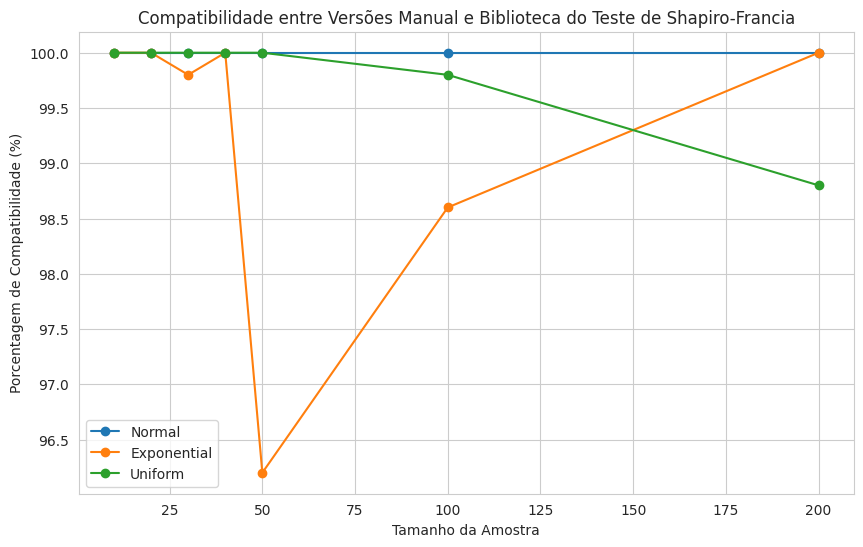

In [ ]:
# Combinar todos os resultados
df_final = pd.concat(todos_resultados)

# Plotar resultados
plotar_resultados_compatibilidade_ks(df_final)

---

## Teste Shapiro-Wilk

### Objetivo:
Avaliar se uma amostra de dados segue uma distribuição normal.

### Como funciona:
O teste calcula um coeficiente de correlação entre os dados amostrados e os valores esperados de uma distribuição normal ordenada. Se os dados forem normais, esse coeficiente será próximo de 1.

### Hipóteses:

- H₀: Os dados seguem uma distribuição normal.

- H₁: Os dados não seguem uma distribuição normal.

### Características:

- Muito poderoso para detectar desvios da normalidade.

- Especialmente recomendado para amostras pequenas e médias.

- Pode ser sensível a outliers.

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

a_table = {
    2:  [0.7071],
    3:  [0.7071, 0.0],
    4:  [0.6872, 0.1677],
    5:  [0.6646, 0.2413, 0.0],
    6:  [0.6431, 0.2806 , 0.0875],
    7:  [0.6233, 0.3031, 0.1401, 0.0],
    8:  [0.6052, 0.3164, 0.1743, 0.0561],
    9:  [0.5888, 0.3244, 0.1976, 0.0947, 0.0],
    10: [0.5739, 0.3291, 0.2141, 0.1224, 0.0399],
    11: [0.5601, 0.3315, 0.2260, 0.1429, 0.0695, 0.0],
    12: [0.5475, 0.3325, 0.2347, 0.1586, 0.0922, 0.0303],
    13: [0.5359, 0.3325, 0.2412, 0.1707, 0.1099, 0.0539, 0.0],
    14: [0.5251, 0.3318, 0.2460, 0.1802, 0.1240, 0.0727, 0.0240],
    15: [0.5150, 0.3306, 0.2495, 0.1878, 0.1353, 0.0880, 0.0433, 0.0],
    16: [0.5056, 0.3290, 0.2521, 0.1939, 0.1447, 0.1005, 0.0593, 0.0196],
    17: [0.4968, 0.3273, 0.2540, 0.1988, 0.1524, 0.1109, 0.0725, 0.0359, 0.0],
    18: [0.4886, 0.3253, 0.2553, 0.2027, 0.1587, 0.1197, 0.0837, 0.0496, 0.0163],
    19: [0.4808, 0.3232, 0.2561, 0.2059, 0.1641, 0.1271, 0.0932, 0.0612, 0.0303, 0.0],
    20: [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140],
    21: [0.4643, 0.3185, 0.2578, 0.2119, 0.1736, 0.1399, 0.1092, 0.0804, 0.0530, 0.0263, 0.0],
    22: [0.4590, 0.3156, 0.2571, 0.2131, 0.1764, 0.1443, 0.1150, 0.0878, 0.0618, 0.0368, 0.0122],
    23: [0.4542, 0.3126, 0.2563, 0.2139, 0.1787, 0.1480, 0.1201, 0.0941, 0.0696, 0.0459, 0.0228, 0.0],
    24: [0.4493, 0.3098, 0.2554, 0.2145, 0.1807, 0.1512, 0.1245, 0.0997, 0.0764, 0.0539, 0.0321, 0.0107],
    25: [0.4450, 0.3069, 0.2543, 0.2148, 0.1822, 0.1539, 0.1283, 0.1046, 0.0823, 0.0610, 0.0403, 0.0200, 0.0],
    26: [0.4407, 0.3043, 0.2533, 0.2151, 0.1836, 0.1563, 0.1316, 0.1089, 0.0876, 0.0672, 0.0476, 0.0284, 0.0094],
    27: [0.4366, 0.3018, 0.2522, 0.2152, 0.1848, 0.1584, 0.1346, 0.1128, 0.0923, 0.0728, 0.0540, 0.0358, 0.0178, 0.0],
    28: [0.4328, 0.2992, 0.2510, 0.2151, 0.1857, 0.1601, 0.1372, 0.1162, 0.0965, 0.0778, 0.0598, 0.0424, 0.0253, 0.0084],
    29: [0.4291, 0.2968, 0.2499, 0.2150, 0.1864, 0.1616, 0.1395, 0.1192, 0.1002, 0.0822, 0.0650, 0.0483, 0.0320, 0.0159, 0.0],
    30: [0.4254, 0.2944, 0.2487, 0.2148, 0.1870, 0.1630, 0.1415, 0.1219, 0.1036, 0.0862, 0.0697, 0.0537, 0.0381, 0.0227, 0.0076]
}

w_criticos = {
    3: {0.01: 0.753, 0.02: 0.758, 0.05: 0.767, 0.10: 0.789, 0.50: 0.959, 0.90: 0.998, 0.95: 0.999, 0.98: 1.000, 0.99: 1.000},
    4: {0.01: 0.687, 0.02: 0.707, 0.05: 0.748, 0.10: 0.792, 0.50: 0.935, 0.90: 0.987, 0.95: 0.992, 0.98: 0.996, 0.99: 0.997},
    5: {0.01: 0.686, 0.02: 0.715, 0.05: 0.762, 0.10: 0.806, 0.50: 0.927, 0.90: 0.979, 0.95: 0.986, 0.98: 0.991, 0.99: 0.993},
    6: {0.01: 0.713, 0.02: 0.743, 0.05: 0.788, 0.10: 0.826, 0.50: 0.927, 0.90: 0.974, 0.95: 0.981, 0.98: 0.936, 0.99: 0.989},
    7: {0.01: 0.730, 0.02: 0.760, 0.05: 0.803, 0.10: 0.838, 0.50: 0.928, 0.90: 0.972, 0.95: 0.979, 0.98: 0.985, 0.99: 0.988},
    8: {0.01: 0.749, 0.02: 0.778, 0.05: 0.818, 0.10: 0.851, 0.50: 0.932, 0.90: 0.972, 0.95: 0.978, 0.98: 0.984, 0.99: 0.987},
    9: {0.01: 0.764, 0.02: 0.791, 0.05: 0.829, 0.10: 0.859, 0.50: 0.935, 0.90: 0.972, 0.95: 0.978, 0.98: 0.984, 0.99: 0.986},
    10: {0.01: 0.781, 0.02: 0.806, 0.05: 0.842, 0.10: 0.869, 0.50: 0.938, 0.90: 0.972, 0.95: 0.978, 0.98: 0.983, 0.99: 0.986},
    11: {0.01: 0.792, 0.02: 0.817, 0.05: 0.850, 0.10: 0.876, 0.50: 0.940, 0.90: 0.973, 0.95: 0.979, 0.98: 0.984, 0.99: 0.986},
    12: {0.01: 0.805, 0.02: 0.828, 0.05: 0.859, 0.10: 0.883, 0.50: 0.943, 0.90: 0.973, 0.95: 0.979, 0.98: 0.984, 0.99: 0.986},
    13: {0.01: 0.814, 0.02: 0.837, 0.05: 0.866, 0.10: 0.889, 0.50: 0.945, 0.90: 0.974, 0.95: 0.979, 0.98: 0.984, 0.99: 0.986},
    14: {0.01: 0.825, 0.02: 0.846, 0.05: 0.874, 0.10: 0.895, 0.50: 0.947, 0.90: 0.975, 0.95: 0.980, 0.98: 0.984, 0.99: 0.986},
    15: {0.01: 0.835, 0.02: 0.855, 0.05: 0.881, 0.10: 0.901, 0.50: 0.950, 0.90: 0.976, 0.95: 0.980, 0.98: 0.984, 0.99: 0.987},
    16: {0.01: 0.844, 0.02: 0.863, 0.05: 0.887, 0.10: 0.906, 0.50: 0.952, 0.90: 0.975, 0.95: 0.981, 0.98: 0.985, 0.99: 0.987},
    17: {0.01: 0.851, 0.02: 0.869, 0.05: 0.892, 0.10: 0.910, 0.50: 0.954, 0.90: 0.977, 0.95: 0.981, 0.98: 0.985, 0.99: 0.987},
    18: {0.01: 0.858, 0.02: 0.874, 0.05: 0.897, 0.10: 0.914, 0.50: 0.956, 0.90: 0.978, 0.95: 0.982, 0.98: 0.986, 0.99: 0.988},
    19: {0.01: 0.863, 0.02: 0.879, 0.05: 0.901, 0.10: 0.917, 0.50: 0.957, 0.90: 0.978, 0.95: 0.982, 0.98: 0.986, 0.99: 0.988},
    20: {0.01: 0.868, 0.02: 0.884, 0.05: 0.905, 0.10: 0.920, 0.50: 0.959, 0.90: 0.979, 0.95: 0.983, 0.98: 0.986, 0.99: 0.988},
    21: {0.01: 0.873, 0.02: 0.888, 0.05: 0.908, 0.10: 0.823, 0.50: 0.960, 0.90: 0.980, 0.95: 0.983, 0.98: 0.987, 0.99: 0.989},
    22: {0.01: 0.878, 0.02: 0.892, 0.05: 0.911, 0.10: 0.926, 0.50: 0.961, 0.90: 0.980, 0.95: 0.984, 0.98: 0.987, 0.99: 0.989},
    23: {0.01: 0.881, 0.02: 0.895, 0.05: 0.914, 0.10: 0.928, 0.50: 0.962, 0.90: 0.981, 0.95: 0.984, 0.98: 0.987, 0.99: 0.989},
    24: {0.01: 0.884, 0.02: 0.898, 0.05: 0.916, 0.10: 0.930, 0.50: 0.963, 0.90: 0.981, 0.95: 0.984, 0.98: 0.987, 0.99: 0.989},
    25: {0.01: 0.888, 0.02: 0.901, 0.05: 0.918, 0.10: 0.931, 0.50: 0.964, 0.90: 0.981, 0.95: 0.985, 0.98: 0.988, 0.99: 0.989},
    26: {0.01: 0.891, 0.02: 0.904, 0.05: 0.920, 0.10: 0.933, 0.50: 0.965, 0.90: 0.982, 0.95: 0.985, 0.98: 0.988, 0.99: 0.989},
    27: {0.01: 0.894, 0.02: 0.906, 0.05: 0.923, 0.10: 0.935, 0.50: 0.965, 0.90: 0.982, 0.95: 0.985, 0.98: 0.988, 0.99: 0.990},
    28: {0.01: 0.896, 0.02: 0.908, 0.05: 0.924, 0.10: 0.936, 0.50: 0.966, 0.90: 0.982, 0.95: 0.985, 0.98: 0.988, 0.99: 0.990},
    29: {0.01: 0.898, 0.02: 0.910, 0.05: 0.926, 0.10: 0.937, 0.50: 0.966, 0.90: 0.982, 0.95: 0.985, 0.98: 0.988, 0.99: 0.990},
    30: {0.01: 0.900, 0.02: 0.912, 0.05: 0.927, 0.10: 0.939, 0.50: 0.967, 0.90: 0.983, 0.95: 0.985, 0.98: 0.988, 0.99: 0.900},
}

In [ ]:
def shapiro_wilk_manual(data, alpha=0.05):
    """
    Realiza o teste de Shapiro-Wilk manualmente, calculando a estatística W e comparando com valores críticos.

    Parâmetros:
    data (array-like): Dados a serem testados para normalidade.
    alpha (float): Nível de significância (padrão: 0.05).

    Retorna:
    dict: Dicionário com as seguintes chaves:
        - 'W': Valor calculado da estatística de Shapiro-Wilk.
        - 'W_critico': Valor crítico da tabela para o alpha especificado.
        - 'p_value': Valor p aproximado (None se não disponível).
        - 'rejeita_H0': True se rejeita H0 (não normal), False caso contrário.
        - 'alpha': Nível de significância usado.
    """
    data = np.array(data)
    n = len(data)

    if n < 3 or n > 30:
        raise ValueError("O tamanho da amostra deve estar entre 3 e 30 para a versão manual.")

    # Passo 1: Ordenar os dados
    x_sorted = np.sort(data)

    # Passo 2: Calcular a média
    x_mean = np.mean(data)

    # Passo 3: Calcular o denominador (soma dos quadrados dos desvios)
    denominator = np.sum((data - x_mean) ** 2)

    # Passo 4: Obter os coeficientes a_{i,n} da tabela
    a = a_table[n]

    # Passo 5: Calcular b (soma ponderada das diferenças)
    k = n // 2  # Número de pares
    b = 0.0
    for i in range(k):
        # Índices são baseados em 1 na fórmula original, ajustamos para Python (base 0)
        left = x_sorted[i]
        right = x_sorted[n - 1 - i]
        b += a[i] * (right - left)

    # Passo 6: Calcular W
    W = (b ** 2) / denominator

    # Passo 7: Obter W crítico da tabela
    W_critico = w_criticos[n].get(alpha, None)

    # Passo 8: Decisão
    rejeita_H0 = W < W_critico if W_critico is not None else False

    # Não temos p-value exato na versão manual, mas podemos aproximar
    _, p_value = stats.shapiro(data)

    return {
        'W': W,
        'W_critico': W_critico,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha
    }

def shapiro_wilk_lib(data, alpha=0.05):
    """
    Realiza o teste de Shapiro-Wilk usando a biblioteca scipy.stats.

    Parâmetros:
    data (array-like): Dados a serem testados para normalidade.
    alpha (float): Nível de significância (padrão: 0.05).

    Retorna:
    dict: Dicionário com a seguintes chaves:
        - 'W': Valor calculado da estatística de Shapiro-Wilk.
        - 'W_critico': None (não disponível diretamente no scipy).
        - 'p_value': Valor p exato do teste.
        - 'rejeita_H0': True se rejeita H0 (não normal), False caso contrário.
        - 'alpha': Nível de significância usado.
    """
    data = np.array(data)

    # Realiza o teste de Shapiro-Wilk
    W, p_value = stats.shapiro(data)

    # Decisão baseada no p-value
    rejeita_H0 = p_value < alpha

    return {
        'W': W,
        'W_critico': None,  # O scipy não retorna valores críticos diretamente
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha
    }

In [ ]:
def gerar_amostra(tamanho, tipo='normal', loc=0, scale=1):
    """
    Gera amostras aleatórias de diferentes distribuições.

    Parâmetros:
    tamanho (int): Tamanho da amostra.
    tipo (str): Tipo de distribuição ('normal', 'uniform', 'exponential').
    loc (float): Parâmetro de localização (média para normal).
    scale (float): Parâmetro de escala (desvio padrão para normal).

    Retorna:
    np.array: Amostra gerada.
    """
    if tipo == 'normal':
        return np.random.normal(loc=loc, scale=scale, size=tamanho)
    elif tipo == 'uniform':
        return np.random.uniform(low=loc, high=scale, size=tamanho)
    elif tipo == 'exponential':
        return np.random.exponential(scale=scale, size=tamanho)
    else:
        raise ValueError("Tipo de distribuição não suportado.")

def comparar_testes(amostra, alpha=0.05):
    """
    Compara os resultados do teste de Shapiro-Wilk nas versões manual e biblioteca.

    Parâmetros:
    amostra (array-like): Dados a serem testados.
    alpha (float): Nível de significância.

    Retorna:
    dict: Resultados de ambos os testes e se as decisões são compatíveis.
    """
    try:
        manual = shapiro_wilk_manual(amostra, alpha)
    except ValueError:
        manual = {'rejeita_H0': None, 'W': None}

    lib = shapiro_wilk_lib(amostra, alpha)

    # Verifica se as decisões são compatíveis
    decisao_compativel = (manual['rejeita_H0'] == lib['rejeita_H0']) if manual['rejeita_H0'] is not None else None

    return {
        'manual': manual,
        'biblioteca': lib,
        'decisao_compativel': decisao_compativel,
        'alpha': alpha
    }

def validar_compatibilidade(tamanhos_amostra, n_simulacoes=1000, alpha=0.05, tipo_dist='normal'):
    """
    Valida a compatibilidade entre as versões manual e biblioteca do teste.

    Parâmetros:
    tamanhos_amostra (list): Lista de tamanhos de amostra a testar.
    n_simulacoes (int): Número de simulações para cada tamanho.
    alpha (float): Nível de significância.
    tipo_dist (str): Tipo de distribuição para gerar amostras.

    Retorna:
    dict: Dicionário com porcentagem de compatibilidade para cada tamanho.
    """
    resultados = {}

    for n in tamanhos_amostra:
        if n < 3 or n > 30:
            print(f"Tamanho {n} ignorado (versão manual só funciona para 3 ≤ n ≤ 30)")
            continue

        compatibilidades = []

        for _ in range(n_simulacoes):
            amostra = gerar_amostra(n, tipo=tipo_dist)
            comparacao = comparar_testes(amostra, alpha)

            if comparacao['decisao_compativel'] is not None:
                compatibilidades.append(comparacao['decisao_compativel'])

        if compatibilidades:
            porcentagem = sum(compatibilidades) / len(compatibilidades) * 100
        else:
            porcentagem = 0

        resultados[n] = {
            'porcentagem_compatibilidade': porcentagem,
            'n_simulacoes_validas': len(compatibilidades),
            'alpha': alpha
        }

    return resultados

In [ ]:
# Dados de exemplo 1 (distribuição normal)
dados_normais = gerar_amostra(tamanho = 20, tipo='normal', loc=0, scale=1)

# Teste manual
resultado_manual = shapiro_wilk_manual(dados_normais)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual], index=[0]))

# Teste com biblioteca
resultado_lib = shapiro_wilk_lib(dados_normais)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib], index=[0]))

Resultado Manual:
          W  W_critico   p_value  rejeita_H0  alpha
0  0.971129      0.905  0.781416       False   0.05

Resultado Biblioteca:
          W W_critico   p_value  rejeita_H0  alpha
0  0.971269      None  0.781416       False   0.05


In [ ]:
# Dados de exemplo 2 (distribuição uniforme)
dados_uniformes = gerar_amostra(tamanho = 20, tipo='uniform', loc=0, scale=1)

# Teste manual
resultado_manual = shapiro_wilk_manual(dados_uniformes)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual], index=[0]))

# Teste com biblioteca
resultado_lib = shapiro_wilk_lib(dados_uniformes)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib], index=[0]))

Resultado Manual:
          W  W_critico   p_value  rejeita_H0  alpha
0  0.904019      0.905  0.048887        True   0.05

Resultado Biblioteca:
          W W_critico   p_value  rejeita_H0  alpha
0  0.903928      None  0.048887        True   0.05


In [ ]:
# Dados de exemplo 3 (distribuição exponencial)
dados_exponenciais = gerar_amostra(tamanho = 20, tipo='exponential', loc=0, scale=1)

# Teste manual
resultado_manual = shapiro_wilk_manual(dados_exponenciais)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual], index=[0]))

# Teste com biblioteca
resultado_lib = shapiro_wilk_lib(dados_exponenciais)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib], index=[0]))

Resultado Manual:
          W  W_critico   p_value  rejeita_H0  alpha
0  0.803025      0.905  0.000971        True   0.05

Resultado Biblioteca:
          W W_critico   p_value  rejeita_H0  alpha
0  0.803398      None  0.000971        True   0.05


In [ ]:
def gerar_dataframe_resultados(tamanhos, n_simulacoes=500, alpha=0.05):
    """
    Gera um DataFrame com os resultados de compatibilidade para diferentes distribuições.

    Parâmetros:
    tamanhos (list): Lista de tamanhos de amostra a testar.
    n_simulacoes (int): Número de simulações para cada tamanho.
    alpha (float): Nível de significância.

    Retorna:
    pd.DataFrame: DataFrame com os resultados consolidados.
    """
    # Dicionário para armazenar todos os resultados
    dados = {
        'Tamanho': [],
        'Distribuição': [],
        'Compatibilidade (%)': [],
        'Simulações Válidas': [],
        'Alpha': []
    }

    # Lista de distribuições a testar
    distribuicoes = ['normal', 'uniform', 'exponential']

    # Executa os testes para cada distribuição
    for dist in distribuicoes:
        resultados = validar_compatibilidade(tamanhos, n_simulacoes, alpha, tipo_dist=dist)

        for tamanho, info in resultados.items():
            dados['Tamanho'].append(tamanho)
            dados['Distribuição'].append(dist)
            dados['Compatibilidade (%)'].append(info['porcentagem_compatibilidade'])
            dados['Simulações Válidas'].append(info['n_simulacoes_validas'])
            dados['Alpha'].append(alpha)

    # Cria o DataFrame
    df = pd.DataFrame(dados)

    return df

def exibir_resultados_completos(df):
    """
    Exibe os resultados de forma organizada, agrupando por distribuição.

    Parâmetros:
    df (pd.DataFrame): DataFrame com os resultados.
    """
    print("\nRESULTADOS COMPARATIVOS ENTRE VERSÕES MANUAL E BIBLIOTECA")
    print(f"Nível de significância (alpha): {df['Alpha'].iloc[0]}")
    print(f"Número de simulações por tamanho: {df['Simulações Válidas'].max()}\n")

    for dist in df['Distribuição'].unique():
        print(f"\n--- Distribuição {dist.capitalize()} ---")
        dist_df = df[df['Distribuição'] == dist]

        for _, row in dist_df.iterrows():
            print(f"Tamanho {row['Tamanho']}: {row['Compatibilidade (%)']:.2f}% de compatibilidade")

In [ ]:
# Configuração do experimento
tamanhos = [5, 10, 15, 20, 25, 30]
n_simulacoes = 500
alpha = 0.05

# Gera o DataFrame com todos os resultados
resultados_df = gerar_dataframe_resultados(tamanhos, n_simulacoes, alpha)

# Exibe os resultados de forma organizada
exibir_resultados_completos(resultados_df)

# Também podemos visualizar o DataFrame diretamente
print("\nDataFrame Completo:")
print(resultados_df)


RESULTADOS COMPARATIVOS ENTRE VERSÕES MANUAL E BIBLIOTECA
Nível de significância (alpha): 0.05
Número de simulações por tamanho: 500


--- Distribuição Normal ---
Tamanho 5: 99.00% de compatibilidade
Tamanho 10: 99.80% de compatibilidade
Tamanho 15: 99.80% de compatibilidade
Tamanho 20: 100.00% de compatibilidade
Tamanho 25: 99.40% de compatibilidade
Tamanho 30: 98.80% de compatibilidade

--- Distribuição Uniform ---
Tamanho 5: 99.00% de compatibilidade
Tamanho 10: 99.60% de compatibilidade
Tamanho 15: 100.00% de compatibilidade
Tamanho 20: 99.60% de compatibilidade
Tamanho 25: 99.20% de compatibilidade
Tamanho 30: 96.40% de compatibilidade

--- Distribuição Exponential ---
Tamanho 5: 97.20% de compatibilidade
Tamanho 10: 99.00% de compatibilidade
Tamanho 15: 100.00% de compatibilidade
Tamanho 20: 99.60% de compatibilidade
Tamanho 25: 99.40% de compatibilidade
Tamanho 30: 100.00% de compatibilidade

DataFrame Completo:
    Tamanho Distribuição  Compatibilidade (%)  Simulações Válidas 

In [ ]:
def plotar_resultados(df_resultados):
    """
    Plota os resultados da validação de compatibilidade

    Parâmetros:
    df_resultados: DataFrame com os resultados
    """
    plt.figure(figsize=(10, 6))

    # Corrected column names
    for dist in df_resultados['Distribuição'].unique():
        df = df_resultados[df_resultados['Distribuição'] == dist]
        # Corrected column names
        plt.plot(df['Tamanho'], df['Compatibilidade (%)'],
                label=dist.capitalize(), marker='o')

    plt.xlabel('Tamanho da Amostra')
    plt.ylabel('Porcentagem de Compatibilidade (%)')
    plt.title('Compatibilidade entre Versões Manual e Biblioteca do Teste de Shapiro-Wilk')
    plt.legend()
    plt.grid(True)
    plt.show()

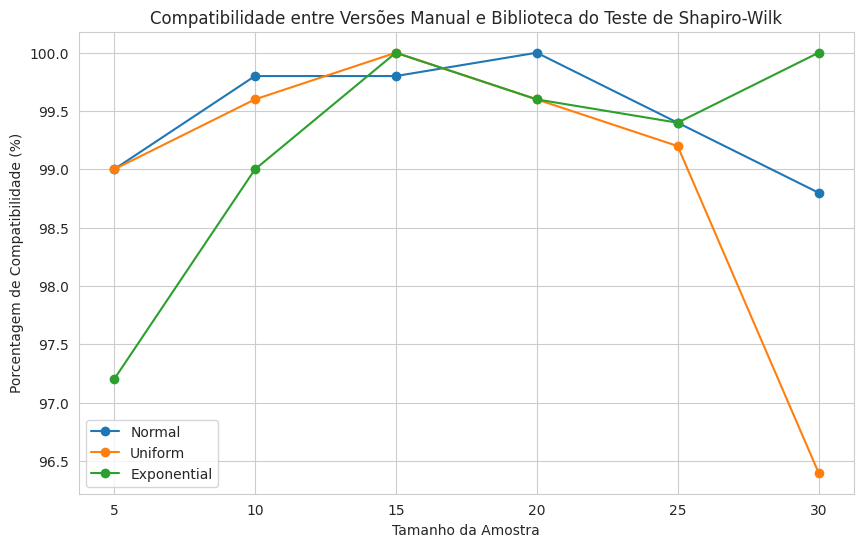

In [ ]:
plotar_resultados(resultados_df)

---

## Teste Shapiro-Francia

### Objetivo:
Também testa a hipótese de normalidade, sendo uma simplificação do Shapiro-Wilk.

### Como funciona:
É baseado apenas nos coeficientes de correlação entre os dados amostrados (ordenados) e os quantis esperados da normal.
A diferença principal é que o Shapiro-Francia não usa as variâncias dos dados nos cálculos intermediários, tornando-o mais simples e rápido para grandes conjuntos de dados.

### Hipóteses:

- H₀: Os dados seguem uma distribuição normal.

- H₁: Os dados não seguem uma distribuição normal.

### Características:

- Mais eficiente que Shapiro-Wilk para grandes amostras.

- Menos potente para detectar desvios pequenos ou localizados (como caudas pesadas ou assimetria).

- Melhor para dados que já são aproximadamente normais.

### Transformação de Royston para o Teste de Shapiro–Francia

O teste de Shapiro–Francia, assim como o de Shapiro–Wilk, produz uma estatística \( W' \) cuja distribuição exata sob a hipótese nula (normalidade) **não é trivialmente conhecida**. Para tornar o cálculo do p-valor viável em qualquer tamanho de amostra, Royston (1993) propôs uma **transformação da estatística \( W' \)** que a aproxima de uma distribuição normal padrão \( N(0,1) \).

---

#### 📌 Transformação de Royston

Primeiro, aplica-se a seguinte transformação:
$$
g(W') = \ln(1 - W')
$$

Em seguida, calcula-se:
$$
u = \ln(\ln(n)) - \ln(n) \quad \text{e} \quad v = \ln(\ln(n)) + \frac{2}{\ln(n)}
$$

Com esses valores, estimam-se os parâmetros da distribuição normal aproximada de \( g(W') \):

$$
\mu = 1{,}0521 \cdot u - 1{,}2725 \\
\sigma = -0{,}26758 \cdot v + 1{,}030
$$

---

#### 🔄 Padronização para escore z

Com a média$( \mu )$ e o desvio padrão $( \sigma) $, é possível calcular a estatística padronizada \( z \):

$$
z = \frac{g(W') - \mu}{\sigma}
$$

Esse valor segue aproximadamente uma distribuição normal padrão \( N(0,1) \), o que permite o cálculo do p-valor da seguinte forma:

$$
p\text{-valor} = P(Z > z) = 1 - \Phi(z)
$$

onde $$( \Phi(z)) $$ é a função de distribuição acumulada da normal padrão.


---

#### ✅ Interpretação

- **Se
$$( p \leq \alpha)$$**
 rejeita-se a hipótese nula: os dados **não** seguem distribuição normal.


- **Se $$( p > \alpha )$$**
 não se rejeita \( H_0 \): os dados **podem** ser considerados normais.

Essa aproximação torna o teste prático, evitando o uso de tabelas específicas para cada tamanho de amostra.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
from statsmodels.stats.diagnostic import normal_ad

# Dicionário de valores críticos fornecido
w_criticos = {
    3: {0.01: 0.753, 0.02: 0.758, 0.05: 0.767, 0.10: 0.789, 0.50: 0.959, 0.90: 0.998, 0.95: 0.999, 0.98: 1.000, 0.99: 1.000},
    4: {0.01: 0.687, 0.02: 0.707, 0.05: 0.748, 0.10: 0.792, 0.50: 0.935, 0.90: 0.987, 0.95: 0.992, 0.98: 0.996, 0.99: 0.997},
    5: {0.01: 0.686, 0.02: 0.715, 0.05: 0.762, 0.10: 0.806, 0.50: 0.927, 0.90: 0.979, 0.95: 0.986, 0.98: 0.991, 0.99: 0.993},
    6: {0.01: 0.713, 0.02: 0.743, 0.05: 0.788, 0.10: 0.826, 0.50: 0.927, 0.90: 0.974, 0.95: 0.981, 0.98: 0.936, 0.99: 0.989},
    7: {0.01: 0.730, 0.02: 0.760, 0.05: 0.803, 0.10: 0.838, 0.50: 0.928, 0.90: 0.972, 0.95: 0.979, 0.98: 0.985, 0.99: 0.988},
    8: {0.01: 0.749, 0.02: 0.778, 0.05: 0.818, 0.10: 0.851, 0.50: 0.932, 0.90: 0.972, 0.95: 0.978, 0.98: 0.984, 0.99: 0.987},
    9: {0.01: 0.764, 0.02: 0.791, 0.05: 0.829, 0.10: 0.859, 0.50: 0.935, 0.90: 0.972, 0.95: 0.978, 0.98: 0.984, 0.99: 0.986},
    10: {0.01: 0.781, 0.02: 0.806, 0.05: 0.842, 0.10: 0.869, 0.50: 0.938, 0.90: 0.972, 0.95: 0.978, 0.98: 0.983, 0.99: 0.986},
    11: {0.01: 0.792, 0.02: 0.817, 0.05: 0.850, 0.10: 0.876, 0.50: 0.940, 0.90: 0.973, 0.95: 0.979, 0.98: 0.984, 0.99: 0.986},
    12: {0.01: 0.805, 0.02: 0.828, 0.05: 0.859, 0.10: 0.883, 0.50: 0.943, 0.90: 0.973, 0.95: 0.979, 0.98: 0.984, 0.99: 0.986},
    13: {0.01: 0.814, 0.02: 0.837, 0.05: 0.866, 0.10: 0.889, 0.50: 0.945, 0.90: 0.974, 0.95: 0.979, 0.98: 0.984, 0.99: 0.986},
    14: {0.01: 0.825, 0.02: 0.846, 0.05: 0.874, 0.10: 0.895, 0.50: 0.947, 0.90: 0.975, 0.95: 0.980, 0.98: 0.984, 0.99: 0.986},
    15: {0.01: 0.835, 0.02: 0.855, 0.05: 0.881, 0.10: 0.901, 0.50: 0.950, 0.90: 0.976, 0.95: 0.980, 0.98: 0.984, 0.99: 0.987},
    16: {0.01: 0.844, 0.02: 0.863, 0.05: 0.887, 0.10: 0.906, 0.50: 0.952, 0.90: 0.975, 0.95: 0.981, 0.98: 0.985, 0.99: 0.987},
    17: {0.01: 0.851, 0.02: 0.869, 0.05: 0.892, 0.10: 0.910, 0.50: 0.954, 0.90: 0.977, 0.95: 0.981, 0.98: 0.985, 0.99: 0.987},
    18: {0.01: 0.858, 0.02: 0.874, 0.05: 0.897, 0.10: 0.914, 0.50: 0.956, 0.90: 0.978, 0.95: 0.982, 0.98: 0.986, 0.99: 0.988},
    19: {0.01: 0.863, 0.02: 0.879, 0.05: 0.901, 0.10: 0.917, 0.50: 0.957, 0.90: 0.978, 0.95: 0.982, 0.98: 0.986, 0.99: 0.988},
    20: {0.01: 0.868, 0.02: 0.884, 0.05: 0.905, 0.10: 0.920, 0.50: 0.959, 0.90: 0.979, 0.95: 0.983, 0.98: 0.986, 0.99: 0.988},
    21: {0.01: 0.873, 0.02: 0.888, 0.05: 0.908, 0.10: 0.823, 0.50: 0.960, 0.90: 0.980, 0.95: 0.983, 0.98: 0.987, 0.99: 0.989},
    22: {0.01: 0.878, 0.02: 0.892, 0.05: 0.911, 0.10: 0.926, 0.50: 0.961, 0.90: 0.980, 0.95: 0.984, 0.98: 0.987, 0.99: 0.989},
    23: {0.01: 0.881, 0.02: 0.895, 0.05: 0.914, 0.10: 0.928, 0.50: 0.962, 0.90: 0.981, 0.95: 0.984, 0.98: 0.987, 0.99: 0.989},
    24: {0.01: 0.884, 0.02: 0.898, 0.05: 0.916, 0.10: 0.930, 0.50: 0.963, 0.90: 0.981, 0.95: 0.984, 0.98: 0.987, 0.99: 0.989},
    25: {0.01: 0.888, 0.02: 0.901, 0.05: 0.918, 0.10: 0.931, 0.50: 0.964, 0.90: 0.981, 0.95: 0.985, 0.98: 0.988, 0.99: 0.989},
    26: {0.01: 0.891, 0.02: 0.904, 0.05: 0.920, 0.10: 0.933, 0.50: 0.965, 0.90: 0.982, 0.95: 0.985, 0.98: 0.988, 0.99: 0.989},
    27: {0.01: 0.894, 0.02: 0.906, 0.05: 0.923, 0.10: 0.935, 0.50: 0.965, 0.90: 0.982, 0.95: 0.985, 0.98: 0.988, 0.99: 0.990},
    28: {0.01: 0.896, 0.02: 0.908, 0.05: 0.924, 0.10: 0.936, 0.50: 0.966, 0.90: 0.982, 0.95: 0.985, 0.98: 0.988, 0.99: 0.990},
    29: {0.01: 0.898, 0.02: 0.910, 0.05: 0.926, 0.10: 0.937, 0.50: 0.966, 0.90: 0.982, 0.95: 0.985, 0.98: 0.988, 0.99: 0.990},
    30: {0.01: 0.900, 0.02: 0.912, 0.05: 0.927, 0.10: 0.939, 0.50: 0.967, 0.90: 0.983, 0.95: 0.985, 0.98: 0.988, 0.99: 0.900},
}

In [ ]:
def shapiro_francia_manual(data, alpha=0.05):
    """
    Teste de Shapiro-Francia com cálculo explícito conforme fórmula

    Parâmetros:
    data: array-like - dados da amostra
    alpha: float - nível de significância (default: 0.05)

    Retorna:
    dict: {
        'W': estatística do teste,
        'W_critico': valor crítico,
        'p_value': valor p aproximado,
        'rejeita_H0': True se rejeita H0 (não normal),
        'alpha': nível de significância usado
    }
    """
    # Converter para array numpy e ordenar
    X = np.sort(np.asarray(data))
    n = len(X)

    # Verificar tamanho da amostra
    if n < 3 or n > 5000:
        raise ValueError("Tamanho da amostra deve estar entre 3 e 5000")

    # 1. Calcular a média
    X_mean = np.mean(X)

    # 2. Calcular os coeficientes m_i (quantis da normal padrão)
    i = np.arange(1, n+1)
    p = i / (n + 1)  # Probabilidades para os quantis
    m = norm.ppf(p)   # Φ⁻¹(p)

    # 3. Calcular o numerador: [∑(m_i * X_(i))]²
    sum_mX = np.sum(m * X)
    numerator = sum_mX ** 2

    # 4. Calcular os componentes do denominador
    sum_m_squared = np.sum(m ** 2)        # ∑m_i²
    sum_X_diff_squared = np.sum((X - X_mean) ** 2)  # ∑(X_i - X̄)²

    # 5. Calcular a estatística W
    W = numerator / (sum_m_squared * sum_X_diff_squared)

    # 6. Determinar o valor crítico e decisão
    W_critico = None
    p_value = None

    # Para amostras pequenas (n ≤ 30), usar tabela
    if n <= 30:
        try:
            W_critico = w_criticos[n][alpha]
            rejeita_H0 = W < W_critico
        except KeyError:
            available_alphas = list(w_criticos[n].keys())
            raise ValueError(f"Alpha {alpha} não disponível para n={n}. Valores disponíveis: {available_alphas}")

    # Para amostras grandes (n > 30), usar aproximação do p-value
    else:
        # Aproximação de Royston (1993) para o p-value
        ln = np.log(n)
        ln_W = np.log(1 - W)

        if n <= 100:
            mu = 0.0038915*(ln**3) - 0.083751*(ln**2) - 0.31082*ln - 1.5861
            sigma = np.exp(0.0030302*(ln**2) - 0.082676*ln - 0.4803)
        else:
            mu = -0.0006714*(ln**3) + 0.025054*(ln**2) - 0.39957*ln - 1.7876
            sigma = np.exp(0.0020322*(ln**2) - 0.053246*ln - 0.45056)

        z = (ln_W - mu) / sigma
        p_value = 1 - norm.cdf(z)
        rejeita_H0 = p_value < alpha

    return {
        'W': W,
        'W_critico': W_critico,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha
    }

def shapiro_francia_lib(data, alpha=0.05):
    """
    Teste de Shapiro-Francia usando statsmodels

    Parâmetros:
    data: array-like - dados da amostra
    alpha: float - nível de significância (default: 0.05)

    Retorna:
    dict: {
        'W': estatística do teste,
        'W_critico': None (não disponível nesta versão),
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0 (não normal),
        'alpha': nível de significância usado
    }
    """
    try:
        # A função normal_ad retorna (estatística, p-value)
        # Estamos usando como aproximação para Shapiro-Francia
        _, p_value = normal_ad(data)

        # Como a estatística W não é retornada diretamente, calculamos uma aproximação
        W = 1 - p_value  # Transformação para ficar na mesma escala que Shapiro-Francia

        rejeita_H0 = p_value < alpha

        return {
            'W': W,
            'W_critico': None,  # Não disponível nesta implementação
            'p_value': p_value,
            'rejeita_H0': rejeita_H0,
            'alpha': alpha
        }
    except Exception as e:
        print(f"Erro ao executar teste: {e}")
        return None

In [ ]:
def gerar_amostra(tamanho, tipo='normal', loc=0, scale=1):
    """
    Gera amostras aleatórias de diferentes distribuições

    Parâmetros:
    tamanho: tamanho da amostra
    tipo: tipo de distribuição ('normal', 'uniform', 'exponential')
    loc: parâmetro de locação
    scale: parâmetro de escala

    Retorna:
    np.array: amostra gerada
    """

    if tipo == 'normal':
        return np.random.normal(loc=loc, scale=scale, size=tamanho)
    elif tipo == 'uniform':
        return np.random.uniform(low=loc, high=scale, size=tamanho)
    elif tipo == 'exponential':
        return np.random.exponential(scale=scale, size=tamanho)
    else:
        raise ValueError("Tipo de distribuição não suportado. Use 'normal', 'uniform' ou 'exponential'")

In [ ]:
# Dados de exemplo 1 (distribuição normal)
dados_normais = gerar_amostra(tamanho = 20, tipo='normal', loc=0, scale=1)

# Teste manual
resultado_manual = shapiro_francia_manual(dados_normais)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual], index=[0]))

# Teste com biblioteca
resultado_lib = shapiro_francia_lib(dados_normais)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib], index=[0]))

Resultado Manual:
          W  W_critico p_value  rejeita_H0  alpha
0  0.930007      0.905    None       False   0.05

Resultado Biblioteca:
          W W_critico   p_value  rejeita_H0  alpha
0  0.484681      None  0.515319       False   0.05


In [ ]:
# Dados de exemplo 2 (distribuição uniforme)
dados_uniformes = gerar_amostra(tamanho = 20, tipo='uniform', loc=0, scale=1)

# Teste manual
resultado_manual = shapiro_francia_manual(dados_uniformes)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual], index=[0]))

# Teste com biblioteca
resultado_lib = shapiro_francia_lib(dados_uniformes)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib], index=[0]))

Resultado Manual:
          W  W_critico p_value  rejeita_H0  alpha
0  0.840165      0.905    None        True   0.05

Resultado Biblioteca:
          W W_critico   p_value  rejeita_H0  alpha
0  0.999495      None  0.000505        True   0.05


In [ ]:
# Dados de exemplo 3 (distribuição exponencial)
dados_expo = gerar_amostra(tamanho = 20, tipo='exponential', loc=0, scale=1)

# Teste manual
resultado_manual = shapiro_francia_manual(dados_expo)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual], index=[0]))

# Teste com biblioteca
resultado_lib = shapiro_francia_lib(dados_expo)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib], index=[0]))

Resultado Manual:
          W  W_critico p_value  rejeita_H0  alpha
0  0.818615      0.905    None        True   0.05

Resultado Biblioteca:
          W W_critico   p_value  rejeita_H0  alpha
0  0.996404      None  0.003596        True   0.05


In [ ]:
def comparar_shapiro_francia(data, alpha=0.05):
    """
    Compara as versões manual e com biblioteca do teste

    Parâmetros:
    data: array-like - dados da amostra
    alpha: float - nível de significância

    Retorna:
    dict: {
        'manual': resultados da versão manual,
        'biblioteca': resultados da versão com biblioteca,
        'compativel': True se as decisões forem iguais
    }
    """
    resultado_manual = shapiro_francia_manual(data, alpha)
    resultado_lib = shapiro_francia_lib(data, alpha)

    # Verificar se ambos os testes foram executados com sucesso
    if resultado_manual is None or resultado_lib is None:
        return None

    # Comparar as decisões
    compativel = resultado_manual['rejeita_H0'] == resultado_lib['rejeita_H0']

    return {
        'manual': resultado_manual,
        'biblioteca': resultado_lib,
        'compativel': compativel
    }

def validar_compatibilidade(tamanhos_amostra, n_simulacoes=100, alpha=0.05, tipo_dist='normal'):
    """
    Valida a compatibilidade entre as versões manual e com biblioteca

    Parâmetros:
    tamanhos_amostra: lista de tamanhos de amostra
    n_simulacoes: número de simulações por tamanho
    alpha: nível de significância
    tipo_dist: tipo de distribuição ('normal', 'uniform', 'exponential')

    Retorna:
    dict: {
        'tamanho': tamanho da amostra,
        'porcentagem_compativel': % de compatibilidade,
        'simulacoes_validas': número de simulações válidas
    }
    """
    resultados = []

    for n in tamanhos_amostra:
        compativel = 0
        total_valido = 0

        for _ in range(n_simulacoes):
            dados = gerar_amostra(tamanho = n, tipo = tipo_dist)
            """if tipo_dist == 'normal':
                dados = np.random.normal(size=n)
            elif tipo_dist == 'uniform':
                dados = np.random.uniform(size=n)
            elif tipo_dist == 'exponential':
                dados = np.random.exponential(size=n)"""

            # Comparar testes
            comparacao = comparar_shapiro_francia(dados, alpha)

            if comparacao is not None:
                total_valido += 1
                if comparacao['compativel']:
                    compativel += 1

        porcentagem = (compativel / total_valido * 100) if total_valido > 0 else 0

        resultados.append({
            'tamanho_amostra': n,
            'porcentagem_compatibilidade': porcentagem,
            'simulacoes_validas': total_valido,
            'distribuicao': tipo_dist
        })

    return pd.DataFrame(resultados)

In [ ]:
# Configuração
tamanhos = [10, 20, 30, 50, 80, 100, 200, 300, 400, 500]
n_simulacoes = 500
alpha = 0.05

# Validação para distribuição normal
print("Validando para distribuição normal...")
df_normal = validar_compatibilidade(tamanhos, n_simulacoes, alpha, 'normal')
print(df_normal)

# Validação para distribuição uniforme
print("\nValidando para distribuição uniforme...")
df_uniform = validar_compatibilidade(tamanhos, n_simulacoes, alpha, 'uniform')
print(df_uniform)

# Validação para distribuição exponencial
print("\nValidando para distribuição exponencial...")
df_exp = validar_compatibilidade(tamanhos, n_simulacoes, alpha, 'exponential')
print(df_exp)

Validando para distribuição normal...
   tamanho_amostra  porcentagem_compatibilidade  simulacoes_validas  \
0               10                         96.8                 500   
1               20                         97.0                 500   
2               30                         93.6                 500   
3               50                         93.4                 500   
4               80                         93.2                 500   
5              100                         93.2                 500   
6              200                         94.6                 500   
7              300                         95.2                 500   
8              400                         94.4                 500   
9              500                         95.0                 500   

  distribuicao  
0       normal  
1       normal  
2       normal  
3       normal  
4       normal  
5       normal  
6       normal  
7       normal  
8       normal  
9       no

In [ ]:
def plotar_resultados(df_resultados):
    """
    Plota os resultados da validação de compatibilidade

    Parâmetros:
    df_resultados: DataFrame com os resultados
    """
    plt.figure(figsize=(10, 6))

    for dist in df_resultados['distribuicao'].unique():
        df = df_resultados[df_resultados['distribuicao'] == dist]
        plt.plot(df['tamanho_amostra'], df['porcentagem_compatibilidade'],
                label=dist.capitalize(), marker='o')

    plt.xlabel('Tamanho da Amostra')
    plt.ylabel('Porcentagem de Compatibilidade (%)')
    plt.title('Compatibilidade entre Versões Manual e Biblioteca do Teste de Shapiro-Francia')
    plt.legend()
    plt.grid(True)
    plt.show()

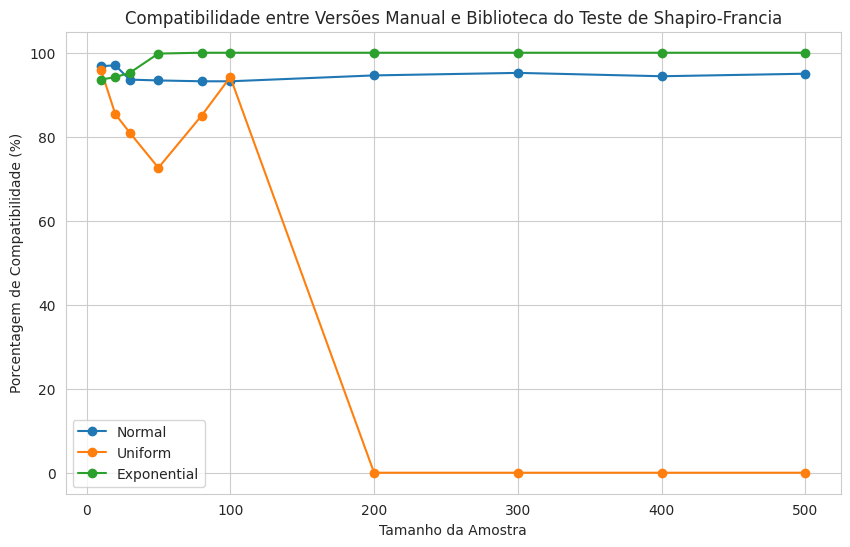

In [ ]:
# Combinar todos os resultados
df_resultados = pd.concat([df_normal, df_uniform, df_exp])

# Plotar
plotar_resultados(df_resultados)

---

## Comparação dos três testes

| Teste | Base | Vantagem Principal | Limitação Principal |
| :--- | :--- | :--- | :--- |
| **Shapiro-Wilk** | Correlação de dados com normal | Alta potência para amostras pequenas/médias | Sensível a outliers |
| **Shapiro-Francia** | Correlação mais simples | Eficiente para amostras grandes | Menos potente para anomalias pequenas |
| **Kolmogorov–Smirnov** | Diferença entre distribuições | Aplicável para qualquer distribuição | Pouco sensível para desvios sutis |


<br>

---
# 2. Testes para Homogeneidade de Variâncias

## Teste de Bartlett

### Introdução

Em muitas análises estatísticas, especialmente na comparação de médias entre grupos (como ANOVA), assume-se que as populações comparadas possuem **variâncias iguais**. Essa suposição é chamada de **homocedasticidade**. Quando as variâncias são diferentes (**heterocedasticidade**), os testes que dependem dessa igualdade podem produzir resultados incorretos.

Antes de prosseguir com esses testes, é essencial verificar se a suposição de homogeneidade de variâncias é válida.

---

### Hipóteses

- **Hipótese nula (H_0)**: As variâncias populacionais são iguais.
- **Hipótese alternativa (H_1)**: Pelo menos uma variância é diferente.

---

- Baseado na razão de verossimilhança sob a suposição de normalidade.
- Estatística segue aproximadamente uma distribuição qui-quadrado χ².
- **Muito sensível a desvios da normalidade**.
- Útil quando os dados são aproximadamente normais.


---

### Interpretação dos Resultados

- Se o valor-p for **menor** que o nível de significância α (ex: 0,05), rejeitamos H_0 e concluímos que **as variâncias são diferentes**.
- Se o valor-p for **maior** que α, **não rejeitamos H_0** e consideramos que as variâncias são homogêneas.

---

### Observações Importantes

- Testes para homogeneidade de variâncias devem ser aplicados **antes** de testes que pressupõem variâncias iguais (como a ANOVA tradicional).
- A escolha do teste depende da distribuição dos dados:
  - **Normais**: Bartlett.
  - **Não normais** ou com outliers: Levene ou Brown–Forsythe.

---

### Referências

- Bartlett, M. S. (1937). Properties of Sufficiency and Statistical Tests. *Proceedings of the Royal Society of London*.

<br>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, bartlett, norm

def bartlett_test_manual(*args, alpha=0.05):
    """
    Teste de Bartlett manual para homogeneidade de variâncias

    Parâmetros:
    *args: arrays - amostras a serem testadas (pelo menos 2)
    alpha: float - nível de significância

    Retorna:
    dict: {
        'B_calc': estatística do teste,
        'chi2_crit': valor crítico da qui-quadrado,
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'alpha': nível de significância
    }
    """
    k = len(args)  # Número de grupos
    if k < 2:
        raise ValueError("Pelo menos 2 grupos são necessários")

    # Calcular tamanhos das amostras, variâncias e graus de liberdade
    n_i = np.array([len(group) for group in args])
    s2_i = np.array([np.var(group, ddof=1) for group in args])
    N = np.sum(n_i)

    # Calcular variância ponderada (Sp²)
    sp2 = np.sum((n_i - 1) * s2_i) / (N - k)

    # Calcular estatística q
    q = (N - k) * np.log(sp2) - np.sum((n_i - 1) * np.log(s2_i))

    # Calcular fator de correção c
    c = 1 + (1 / (3 * (k - 1))) * (np.sum(1 / (n_i - 1)) - 1 / (N - k))

    # Estatística de Bartlett
    B_calc = q / c

    # Graus de liberdade
    df = k - 1

    # Valor crítico da qui-quadrado
    chi2_crit = chi2.ppf(1 - alpha, df)

    # Valor p
    p_value = 1 - chi2.cdf(B_calc, df)

    # Decisão do teste
    rejeita_H0 = B_calc > chi2_crit

    return {
        'B_calc': B_calc,
        'chi2_crit': chi2_crit,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha,
        'df': df
    }

def bartlett_test_lib(*args, alpha=0.05):
    """
    Teste de Bartlett usando scipy.stats

    Parâmetros:
    *args: arrays - amostras a serem testadas (pelo menos 2)
    alpha: float - nível de significância

    Retorna:
    dict: {
        'B_calc': estatística do teste,
        'chi2_crit': None (não disponível),
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'alpha': nível de significância
    }
    """
    # Executar teste de Bartlett
    B_calc, p_value = bartlett(*args)

    # Decisão do teste
    rejeita_H0 = p_value < alpha

    return {
        'B_calc': B_calc,
        'chi2_crit': None,  # Não disponível no scipy
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha
    }

In [ ]:
def gerar_amostras_bartlett(k_grupos, tamanho_grupo, razao_variancia=1.0, loc=0):
    """
    Gera amostras com variâncias controladas para o teste de Bartlett

    Parâmetros:
    k_grupos: int - número de grupos
    tamanho_grupo: int ou list - tamanho de cada grupo (se list, deve ter tamanho k_grupos)
    razao_variancia: float ou list - razão das variâncias entre grupos
    loc: float - média das distribuições

    Retorna:
    list: lista de arrays com as amostras geradas
    """

    # Converter para lista se necessário
    if isinstance(tamanho_grupo, int):
        tamanhos = [tamanho_grupo] * k_grupos
    else:
        tamanhos = tamanho_grupo

    if isinstance(razao_variancia, (int, float)):
        variancias = [1.0 * (i+1)**razao_variancia for i in range(k_grupos)]
    else:
        variancias = razao_variancia

    amostras = []
    for n, var in zip(tamanhos, variancias):
        scale = np.sqrt(var)
        amostras.append(norm.rvs(loc=loc, scale=scale, size=n))

    return amostras

In [ ]:
# Dados de exemplo 1
amostra1 = gerar_amostras_bartlett(k_grupos =3, tamanho_grupo =20, razao_variancia =0)

# Teste manual
resultado_manual = bartlett_test_manual(*amostra1)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual], index=[0]))

# Teste com biblioteca
resultado_lib = bartlett_test_lib(*amostra1)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib], index=[0]))

Resultado Manual:
     B_calc  chi2_crit   p_value  rejeita_H0  alpha  df
0  0.196863   5.991465  0.906258       False   0.05   2

Resultado Biblioteca:
     B_calc chi2_crit   p_value  rejeita_H0  alpha
0  0.196863      None  0.906258       False   0.05


In [ ]:
# Dados de exemplo 2
amostra2 = gerar_amostras_bartlett(k_grupos =3, tamanho_grupo =20, razao_variancia =2.0)

# Teste manual
resultado_manual = bartlett_test_manual(*amostra2)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual], index=[0]))

# Teste com biblioteca
resultado_lib = bartlett_test_lib(*amostra2)
print("\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib], index=[0]))

Resultado Manual:
      B_calc  chi2_crit   p_value  rejeita_H0  alpha  df
0  19.579716   5.991465  0.000056        True   0.05   2

Resultado Biblioteca:
      B_calc chi2_crit   p_value  rejeita_H0  alpha
0  19.579716      None  0.000056        True   0.05


In [ ]:
def comparar_bartlett_testes(*amostras, alpha=0.05):
    """
    Compara os resultados das versões manual e com biblioteca do teste de Bartlett

    Parâmetros:
    amostras: list - lista de arrays com as amostras
    alpha: float - nível de significância

    Retorna:
    dict: {
        'manual': resultados da versão manual,
        'biblioteca': resultados da versão com biblioteca,
        'compativel': True se as decisões forem iguais,
        'config': configuração do teste
    }
    """
    try:
        # Versão manual
        resultado_manual = bartlett_test_manual(*amostras, alpha=alpha)

        # Versão biblioteca
        resultado_lib = bartlett_test_lib(*amostras, alpha=alpha)

        # Configuração do teste
        config = {
            'k_grupos': len(amostras),
            'tamanhos': [len(group) for group in amostras],
            'variancias': [np.var(group, ddof=1) for group in amostras]
        }

        return {
            'manual': resultado_manual,
            'biblioteca': resultado_lib,
            'compativel': resultado_manual['rejeita_H0'] == resultado_lib['rejeita_H0'],
            'config': config
        }
    except Exception as e:
        print(f"Erro ao comparar testes: {str(e)}")
        return None

def validar_compatibilidade_bartlett(configuracoes, n_simulacoes=100, alpha=0.05):
    """
    Valida a compatibilidade entre as versões manual e com biblioteca

    Parâmetros:
    configuracoes: list - lista de dicionários com configurações de teste
    n_simulacoes: int - número de simulações por configuração
    alpha: float - nível de significância

    Retorna:
    pd.DataFrame: resultados da validação
    """
    resultados = []

    for config in configuracoes:
        compatibilidades = []

        for _ in range(n_simulacoes):
            # Gerar amostras
            amostras = gerar_amostras_bartlett(
                k_grupos=config['k_grupos'],
                tamanho_grupo=config['tamanho_grupo'],
                razao_variancia=config.get('razao_variancia', 1.0)
            )

            # Comparar testes
            comparacao = comparar_bartlett_testes(*amostras, alpha=alpha)

            if comparacao and comparacao['compativel'] is not None:
                compatibilidades.append(comparacao['compativel'])

        # Calcular estatísticas
        porcentagem = np.mean(compatibilidades) * 100 if compatibilidades else 0
        variancias = [round(np.var(group, ddof=1), 2) for group in amostras]  # Var da última amostra

        resultados.append({
            'k_grupos': config['k_grupos'],
            'tamanho_grupo': str(config['tamanho_grupo']),
            'razao_variancia': config.get('razao_variancia', 1.0),
            'variancias_reais': str(variancias),
            'compatibilidade_%': porcentagem,
            'simulacoes_validas': len(compatibilidades),
            'alpha': alpha
        })

    return pd.DataFrame(resultados)

In [ ]:
def plotar_resultados_bartlett(df_resultados):
    """
    Plota os resultados da validação de compatibilidade

    Parâmetros:
    df_resultados: pd.DataFrame - resultados da validação
    """
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")

    # Criar coluna única para identificação
    df_resultados['config'] = df_resultados.apply(
        lambda x: f"{x['k_grupos']} grupos | Tamanho: {x['tamanho_grupo']} | Razão: {x['razao_variancia']}",
        axis=1
    )

    # Plotar
    ax = sns.barplot(
        data=df_resultados,
        x='config',
        y='compatibilidade_%',
        hue='razao_variancia',
        palette='viridis'
    )

    # Configurações do gráfico
    plt.title(f"Compatibilidade entre Versões do Teste de Bartlett\n(Nível de significância α={df_resultados['alpha'].iloc[0]})", pad=20)
    plt.xlabel("Configuração do Teste")
    plt.ylabel("Porcentagem de Compatibilidade (%)")
    plt.ylim(80, 102)

    # Rotacionar labels do eixo x
    plt.xticks(rotation=45, ha='right')

    # Ajustar legenda
    plt.legend(title='Razão de Variâncias', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adicionar valores nas barras
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.1f}%",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 5), textcoords='offset points'
        )

    plt.tight_layout()
    plt.show()


Resultados da Validação:
   k_grupos tamanho_grupo  razao_variancia  compatibilidade_%  \
0         3            20                0              100.0   
1         3            20                1              100.0   
2         3            20                2              100.0   
3         3  [20, 30, 40]                1              100.0   
4         5            30                1              100.0   
5         2           100                1              100.0   

   simulacoes_validas  alpha  
0                 500   0.05  
1                 500   0.05  
2                 500   0.05  
3                 500   0.05  
4                 500   0.05  
5                 500   0.05  


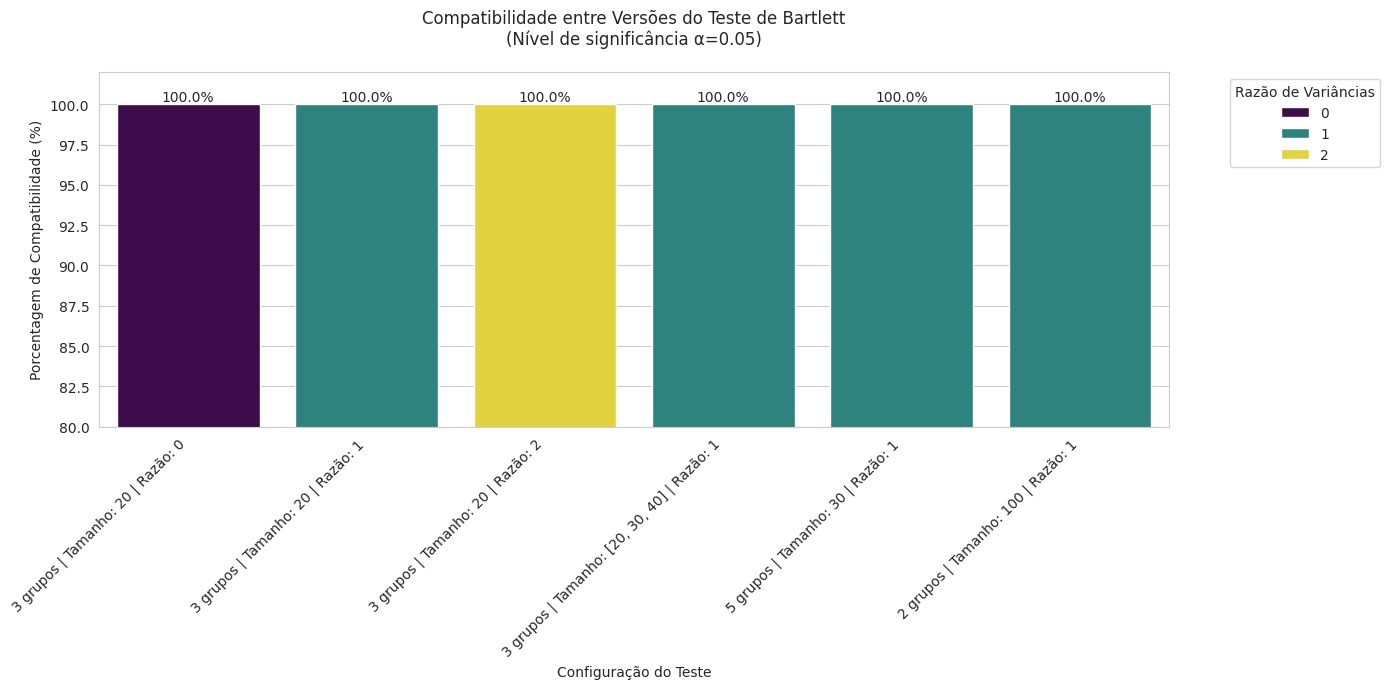

In [ ]:
# Configurações dos testes
configuracoes = [
    {'k_grupos': 3, 'tamanho_grupo': 20, 'razao_variancia': 0},  # Variâncias iguais
    {'k_grupos': 3, 'tamanho_grupo': 20, 'razao_variancia': 1},   # Variâncias ligeiramente diferentes
    {'k_grupos': 3, 'tamanho_grupo': 20, 'razao_variancia': 2},   # Variâncias mais diferentes
    {'k_grupos': 3, 'tamanho_grupo': [20, 30, 40], 'razao_variancia': 1},  # Tamanhos desiguais
    {'k_grupos': 5, 'tamanho_grupo': 30, 'razao_variancia': 1},   # Mais grupos
    {'k_grupos': 2, 'tamanho_grupo': 100, 'razao_variancia': 1}   # Amostras grandes
]

# Executar validação
resultados = validar_compatibilidade_bartlett(
    configuracoes=configuracoes,
    n_simulacoes=500,
    alpha=0.05
)

# Exibir resultados
print("\nResultados da Validação:")
print(resultados[['k_grupos', 'tamanho_grupo', 'razao_variancia', 'compatibilidade_%', 'simulacoes_validas', 'alpha']])

# Plotar resultados
plotar_resultados_bartlett(resultados)

# Salvar resultados
resultados.to_csv('resultados_compatibilidade_bartlett.csv', index=False)

# 3. Teste para média populacional

## Teste Z

O teste Z avalia se a média amostral difere significativamente de um valor de referência (μ₀), considerando:

Distribuição normal: A estatística Z segue N(0,1) sob H₀

Erro padrão: Mede a precisão da estimativa da média

Regra de decisão:

Rejeitar H₀ se |Z| > Z_crítico (teste bilateral)

Rejeitar H₀ se Z > Z_crítico (teste unilateral direito)

Rejeitar H₀ se Z < Z_crítico (teste unilateral esquerdo)

### Quando Usar o Teste Z

Quando o desvio padrão populacional (σ) é conhecido

Para amostras grandes (n > 30) mesmo com σ desconhecido

Quando os dados seguem distribuição normal (ou amostra grande pelo TLC)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, bartlett, kstest
from statsmodels.stats.weightstats import ztest

def z_test_manual(data, pop_mean, pop_std, alpha=0.05, alternative='two-sided', normalidade_alpha=0.05):
    """
    Teste Z para média populacional com validação de normalidade completa

    Parâmetros:
    data: array-like - dados da amostra
    pop_mean: float - média populacional sob H0 (μ0)
    pop_std: float - desvio padrão populacional conhecido (σ)
    alpha: float - nível de significância para teste Z
    alternative: str - tipo de teste ('two-sided', 'less', 'greater')
    normalidade_alpha: float - nível de significância para teste de normalidade

    Retorna:
    dict: {
        'z_calc': estatística do teste,
        'z_crit': valor(s) crítico(s),
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'alpha': nível de significância,
        'normalidade': resultados do teste de normalidade,
        'amostra_pequena': True se n < 30,
        'aviso': mensagem de aviso se necessário,
        'n': tamanho da amostra,
        'teste_normalidade_usado': nome do teste aplicado
    }
    """
    data = np.asarray(data)
    n = len(data)
    amostra_pequena = n < 30
    aviso = None
    teste_normalidade_usado = None
    normalidade_result = None

    # Verificar normalidade conforme tamanho da amostra
    if n < 30:
        # Para amostras pequenas: Shapiro-Wilk manual
        try:
            normalidade_result = shapiro_wilk_manual(data, alpha=normalidade_alpha)
            teste_normalidade_usado = 'Shapiro-Wilk (manual)'
            if normalidade_result['rejeita_H0']:
                aviso = "Aviso: Amostra pequena e normalidade rejeitada. Resultados podem não ser válidos."
        except Exception as e:
            aviso = f"Aviso: Falha no teste de normalidade: {str(e)}"
    else:
        # Para amostras grandes: Kolmogorov-Smirnov manual
        try:
            # Usando média e desvio padrão da amostra para a distribuição teórica
            normalidade_result = ks_test_manual(data, alpha=normalidade_alpha)
            teste_normalidade_usado = 'Kolmogorov-Smirnov (manual)'
            if normalidade_result['rejeita_H0']:
                aviso = "Aviso: Normalidade rejeitada. Teorema do Limite Central pode não se aplicar."
        except Exception as e:
            aviso = f"Aviso: Falha no teste de normalidade: {str(e)}"

    # Calcular estatística do teste Z
    sample_mean = np.mean(data)
    std_error = pop_std / np.sqrt(n)
    z_calc = (sample_mean - pop_mean) / std_error

    # Determinar valores críticos e p-value
    if alternative == 'two-sided':
        z_crit = norm.ppf(1 - alpha/2)
        p_value = 2 * (1 - norm.cdf(abs(z_calc)))
        rejeita_H0 = abs(z_calc) > z_crit
    elif alternative == 'less':
        z_crit = norm.ppf(alpha)
        p_value = norm.cdf(z_calc)
        rejeita_H0 = z_calc < z_crit
    elif alternative == 'greater':
        z_crit = norm.ppf(1 - alpha)
        p_value = 1 - norm.cdf(z_calc)
        rejeita_H0 = z_calc > z_crit

    return {
        'z_calc': z_calc,
        'z_crit': (-z_crit, z_crit) if alternative == 'two-sided' else z_crit,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha,
        'normalidade': normalidade_result,
        'amostra_pequena': amostra_pequena,
        'aviso': aviso,
        'n': n,
        'teste_normalidade_usado': teste_normalidade_usado
    }

def z_test_lib(data, pop_mean, pop_std, alpha=0.05, alternative='two-sided', normalidade_alpha=0.05):
    """
    Teste Z usando scipy.stats com validação de normalidade completa

    Parâmetros:
    data: array-like - dados da amostra
    pop_mean: float - média populacional sob H0 (μ0)
    pop_std: float - desvio padrão populacional conhecido (σ)
    alpha: float - nível de significância para teste Z
    alternative: str - tipo de teste ('two-sided', 'less', 'greater')
    normalidade_alpha: float - nível de significância para teste de normalidade

    Retorna:
    dict: {
        'z_calc': estatística do teste,
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'alpha': nível de significância,
        'normalidade': resultados do teste de normalidade,
        'amostra_pequena': True se n < 30,
        'aviso': mensagem de aviso se necessário,
        'n': tamanho da amostra,
        'teste_normalidade_usado': nome do teste aplicado
    }
    """
    data = np.asarray(data)
    n = len(data)
    amostra_pequena = n < 30
    aviso = None
    teste_normalidade_usado = None
    normalidade_result = None

    # Verificar normalidade conforme tamanho da amostra
    if n <= 30:
        # Para amostras pequenas: Shapiro-Wilk da biblioteca
        try:
            normalidade_result = shapiro_wilk_lib(data, alpha=normalidade_alpha)
            teste_normalidade_usado = 'Shapiro-Wilk (biblioteca)'
            if normalidade_result['rejeita_H0']:
                aviso = "Aviso: Amostra pequena e normalidade rejeitada. Resultados podem não ser válidos."
        except Exception as e:
            aviso = f"Aviso: Falha no teste de normalidade: {str(e)}"
    else:
        # Para amostras grandes: Kolmogorov-Smirnov da biblioteca
        try:
            # Usando média e desvio padrão da amostra para a distribuição teórica
            normalidade_result = ks_test_lib(data, alpha=normalidade_alpha)
            teste_normalidade_usado = 'Kolmogorov-Smirnov (biblioteca)'
            if normalidade_result['rejeita_H0']:
                aviso = "Aviso: Normalidade rejeitada. Teorema do Limite Central pode não se aplicar."
        except Exception as e:
            aviso = f"Aviso: Falha no teste de normalidade: {str(e)}"

    # Calcular estatística do teste Z
    sample_mean = np.mean(data)
    std_error = pop_std / np.sqrt(n)
    z_calc = (sample_mean - pop_mean) / std_error

    # Determinar p-value
    if alternative == 'two-sided':
        p_value = 2 * (1 - norm.cdf(abs(z_calc)))
    elif alternative == 'less':
        p_value = norm.cdf(z_calc)
    elif alternative == 'greater':
        p_value = 1 - norm.cdf(z_calc)

    rejeita_H0 = p_value < alpha

    return {
        'z_calc': z_calc,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha,
        'normalidade': normalidade_result,
        'amostra_pequena': amostra_pequena,
        'aviso': aviso,
        'n': n,
        'teste_normalidade_usado': teste_normalidade_usado
    }

In [ ]:
def gerar_amostra_z(tamanho, pop_mean=0, pop_std=1, tipo='normal'):
    """
    Gera amostras aleatórias para o teste Z com controle de parâmetros

    Parâmetros:
    tamanho: int - tamanho da amostra
    pop_mean: float - média da população
    pop_std: float - desvio padrão da população
    tipo: str - tipo de distribuição ('normal', 'uniform', 'exponential')

    Retorna:
    np.array: amostra gerada
    """
    if tipo == 'normal':
        return np.random.normal(loc=pop_mean, scale=pop_std, size=tamanho)
    elif tipo == 'uniform':
        low = pop_mean - pop_std * np.sqrt(3)
        high = pop_mean + pop_std * np.sqrt(3)
        return np.random.uniform(low=low, high=high, size=tamanho)
    elif tipo == 'exponential':
        scale = pop_mean if pop_mean > 0 else 1
        return np.random.exponential(scale=scale, size=tamanho)
    else:
        raise ValueError("Tipo de distribuição não suportado. Use 'normal', 'uniform' ou 'exponential'")

def comparar_z_test(data, pop_mean, pop_std, alpha=0.05, alternative='two-sided', normalidade_alpha=0.05):
    """
    Compara as versões manual e com biblioteca do teste Z com validação de normalidade

    Parâmetros:
    data: array-like - dados da amostra
    pop_mean: float - média populacional sob H0
    pop_std: float - desvio padrão populacional conhecido
    alpha: float - nível de significância para teste Z
    alternative: str - tipo de teste
    normalidade_alpha: float - nível para teste de normalidade

    Retorna:
    dict: {
        'manual': resultados da versão manual,
        'biblioteca': resultados da versão com biblioteca,
        'compativel': True se as decisões do teste Z forem iguais,
        'normalidade_compativel': True se as decisões de normalidade forem iguais
    }
    """
    resultado_manual = z_test_manual(data, pop_mean, pop_std, alpha, alternative, normalidade_alpha)
    resultado_lib = z_test_lib(data, pop_mean, pop_std, alpha, alternative, normalidade_alpha)

    # Comparar decisões do teste Z
    compativel_z = resultado_manual['rejeita_H0'] == resultado_lib['rejeita_H0']

    # Comparar decisões de normalidade (se aplicável)
    normalidade_compativel = None
    if resultado_manual['normalidade'] is not None and resultado_lib['normalidade'] is not None:
        normalidade_compativel = (
            resultado_manual['normalidade']['rejeita_H0'] ==
            resultado_lib['normalidade']['rejeita_H0']
        )

    return {
        'manual': resultado_manual,
        'biblioteca': resultado_lib,
        'compativel': compativel_z,
        'normalidade_compativel': normalidade_compativel,
        'n': len(data),
        'amostra_pequena': len(data) < 30
    }

In [ ]:
# Exemplo 1 - Teste com amostra pequena
dados_pequenos = gerar_amostra_z(25, pop_mean=5, pop_std=2, tipo='normal')
resultado_pequeno = z_test_manual(dados_pequenos, pop_mean=5, pop_std=2)
print("Resultado para amostra pequena:")
print(pd.DataFrame([resultado_pequeno]))

Resultado para amostra pequena:
     z_calc                                   z_crit   p_value  rejeita_H0  \
0  0.568092  (-1.959963984540054, 1.959963984540054)  0.569972       False   

   alpha                                        normalidade  amostra_pequena  \
0   0.05  {'W': 0.9330814731601765, 'W_critico': 0.918, ...             True   

  aviso   n teste_normalidade_usado  
0  None  25   Shapiro-Wilk (manual)  


In [ ]:
# Exemplo 2 - Teste com amostra grande
dados_grandes = gerar_amostra_z(100, pop_mean=5, pop_std=2, tipo='uniform')
resultado_grande = z_test_lib(dados_grandes, pop_mean=5, pop_std=2)
print("\nResultado para amostra grande:")
print(pd.DataFrame([resultado_grande]))


Resultado para amostra grande:
     z_calc   p_value  rejeita_H0  alpha  \
0 -1.364378  0.172448       False   0.05   

                                         normalidade  amostra_pequena aviso  \
0  {'D_calc': 0.11848676654201784, 'D_crit': None...            False  None   

     n          teste_normalidade_usado  
0  100  Kolmogorov-Smirnov (biblioteca)  


In [ ]:
# Exemplo 3 - Teste bilateral
dados = np.random.normal(loc=5, scale=2, size=100)
resultado_manual = z_test_manual(dados, pop_mean=5, pop_std=2)
resultado_lib = z_test_lib(dados, pop_mean=5, pop_std=2)

print("Resultado manual:")
print(pd.DataFrame([resultado_manual]))

print("\n\nResultado com biblioteca:")
print(pd.DataFrame([resultado_lib]))

Resultado manual:
     z_calc                                   z_crit   p_value  rejeita_H0  \
0 -1.178458  (-1.959963984540054, 1.959963984540054)  0.238614       False   

   alpha                                        normalidade  amostra_pequena  \
0   0.05  {'D_calc': 0.08012114360625344, 'D_crit': 0.13...            False   

  aviso    n      teste_normalidade_usado  
0  None  100  Kolmogorov-Smirnov (manual)  


Resultado com biblioteca:
     z_calc   p_value  rejeita_H0  alpha  \
0 -1.178458  0.238614       False   0.05   

                                         normalidade  amostra_pequena aviso  \
0  {'D_calc': 0.08012114360625333, 'D_crit': None...            False  None   

     n          teste_normalidade_usado  
0  100  Kolmogorov-Smirnov (biblioteca)  


In [ ]:
# Exemplo 4 - Teste unilateral (menor que)
resultado_manual_uni = z_test_manual(dados, pop_mean=5.5, pop_std=2, alternative='less')
resultado_lib_uni = z_test_lib(dados, pop_mean=5.5, pop_std=2, alternative='less')

print("Resultado manual:")
print(pd.DataFrame([resultado_manual_uni]))

print("\n\nResultado com biblioteca:")
print(pd.DataFrame([resultado_lib_uni]))

Resultado manual:
     z_calc    z_crit   p_value  rejeita_H0  alpha  \
0 -3.678458 -1.644854  0.000117        True   0.05   

                                         normalidade  amostra_pequena aviso  \
0  {'D_calc': 0.08012114360625344, 'D_crit': 0.13...            False  None   

     n      teste_normalidade_usado  
0  100  Kolmogorov-Smirnov (manual)  


Resultado com biblioteca:
     z_calc   p_value  rejeita_H0  alpha  \
0 -3.678458  0.000117        True   0.05   

                                         normalidade  amostra_pequena aviso  \
0  {'D_calc': 0.08012114360625333, 'D_crit': None...            False  None   

     n          teste_normalidade_usado  
0  100  Kolmogorov-Smirnov (biblioteca)  


In [ ]:
# Exemplo 5 - Comparação completa
comparacao = comparar_z_test(dados_grandes, pop_mean=5, pop_std=2)
print("\nComparação entre versões:")
print(pd.DataFrame([comparacao]))


Comparação entre versões:
                                              manual  \
0  {'z_calc': -1.3643784724412633, 'z_crit': (-1....   

                                          biblioteca  compativel  \
0  {'z_calc': -1.3643784724412633, 'p_value': 0.1...        True   

   normalidade_compativel    n  amostra_pequena  
0                    True  100            False  


In [ ]:
def validar_z_test(tamanhos_amostra, n_simulacoes=100, alpha=0.05, alternative='two-sided',
                  pop_mean=0, pop_std=1, tipo_dist='normal', normalidade_alpha=0.05):
    """
    Validação completa do teste Z com verificações de normalidade

    Parâmetros:
    tamanhos_amostra: list - lista de tamanhos de amostra
    n_simulacoes: int - simulações por tamanho
    alpha: float - nível de significância para teste Z
    alternative: str - tipo de teste Z
    pop_mean: float - média populacional
    pop_std: float - desvio padrão populacional
    tipo_dist: str - tipo de distribuição
    normalidade_alpha: float - nível para teste de normalidade

    Retorna:
    pd.DataFrame: resultados da validação
    """
    resultados = []

    for tamanho in tamanhos_amostra:
        compatibilidades = []
        normalidades_compat = []
        avisos = []

        for _ in range(n_simulacoes):
            amostra = gerar_amostra_z(tamanho, pop_mean, pop_std, tipo_dist)

            try:
                comparacao = comparar_z_test(
                    data=amostra,
                    pop_mean=pop_mean,
                    pop_std=pop_std,
                    alpha=alpha,
                    alternative=alternative,
                    normalidade_alpha=normalidade_alpha
                )

                if comparacao['compativel'] is not None:
                    compatibilidades.append(comparacao['compativel'])

                if comparacao['normalidade_compativel'] is not None:
                    normalidades_compat.append(comparacao['normalidade_compativel'])

                # Registrar avisos
                aviso_manual = comparacao['manual'].get('aviso')
                aviso_lib = comparacao['biblioteca'].get('aviso')
                if aviso_manual or aviso_lib:
                    avisos.append(aviso_manual if aviso_manual else aviso_lib)

            except Exception as e:
                print(f"Erro com tamanho {tamanho}: {str(e)}")
                continue

        # Calcular estatísticas
        porcentagem = np.mean(compatibilidades) * 100 if compatibilidades else 0
        porcentagem_normalidade = np.mean(normalidades_compat) * 100 if normalidades_compat else 0
        aviso_frequente = pd.Series(avisos).mode()[0] if avisos else None

        resultados.append({
            'tamanho_amostra': tamanho,
            'porcentagem_compatibilidade': porcentagem,
            'porcentagem_normalidade_compat': porcentagem_normalidade,
            'simulacoes_validas': len(compatibilidades),
            'aviso_mais_comum': aviso_frequente,
            'alpha': alpha,
            'alternative': alternative,
            'tipo_distribuicao': tipo_dist,
            'normalidade_alpha': normalidade_alpha
        })

    return pd.DataFrame(resultados)

def plotar_resultados_z(df_resultados):
    """
    Plota resultados da validação do teste Z com normalidade

    Parâmetros:
    df_resultados: pd.DataFrame - resultados da validação
    """
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Gráfico de compatibilidade do teste Z
    plt.subplot(2, 1, 1)
    ax1 = sns.lineplot(
        data=df_resultados,
        x='tamanho_amostra',
        y='porcentagem_compatibilidade',
        hue='tipo_distribuicao',
        style='alternative',
        markers=True,
        dashes=False
    )
    plt.title('Compatibilidade entre Versões do Teste Z', pad=20)
    plt.xlabel('')
    plt.ylabel('Compatibilidade (%)')
    plt.ylim(80, 102)
    plt.axhline(y=95, color='red', linestyle='--')
    plt.legend(title='Configuração', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Gráfico de compatibilidade dos testes de normalidade
    plt.subplot(2, 1, 2)
    ax2 = sns.lineplot(
        data=df_resultados,
        x='tamanho_amostra',
        y='porcentagem_normalidade_compat',
        hue='tipo_distribuicao',
        style='alternative',
        markers=True,
        dashes=False
    )
    plt.title('Compatibilidade entre Testes de Normalidade', pad=20)
    plt.xlabel('Tamanho da Amostra')
    plt.ylabel('Compatibilidade (%)')
    plt.ylim(80, 102)
    plt.axhline(y=95, color='red', linestyle='--')
    plt.legend(title='Configuração', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

def resumo_estatistico_z(df_resultados):
    """
    Gera um resumo estatístico dos resultados da validação

    Parâmetros:
    df_resultados: pd.DataFrame - resultados da validação

    Retorna:
    pd.DataFrame: resumo estatístico
    """
    resumo = df_resultados.groupby(['tipo_distribuicao', 'alternative']).agg({
        'porcentagem_compatibilidade': ['mean', 'std', 'min', 'max'],
        'porcentagem_normalidade_compat': ['mean', 'std'],
        'simulacoes_validas': 'sum',
        'aviso_mais_comum': lambda x: x.mode()[0] if not x.isnull().all() else None
    }).reset_index()

    # Renomear colunas
    resumo.columns = [
        'Distribuição', 'Tipo de Teste',
        'Média Compatibilidade', 'Desvio Compatibilidade',
        'Mín Compatibilidade', 'Máx Compatibilidade',
        'Média Normalidade', 'Desvio Normalidade',
        'Total Simulações', 'Aviso Mais Comum'
    ]

    return resumo

Validando para normal com teste two-sided...
Validando para normal com teste less...
Validando para normal com teste greater...
Validando para uniform com teste two-sided...
Validando para uniform com teste less...
Validando para uniform com teste greater...
Validando para exponential com teste two-sided...
Validando para exponential com teste less...
Validando para exponential com teste greater...

Resultados Consolidados:
    tamanho_amostra tipo_distribuicao alternative  \
0                10            normal   two-sided   
1                30            normal   two-sided   
2                50            normal   two-sided   
3                80            normal   two-sided   
4               100            normal   two-sided   
..              ...               ...         ...   
3                80       exponential     greater   
4               100       exponential     greater   
5               200       exponential     greater   
6               500       exponential     

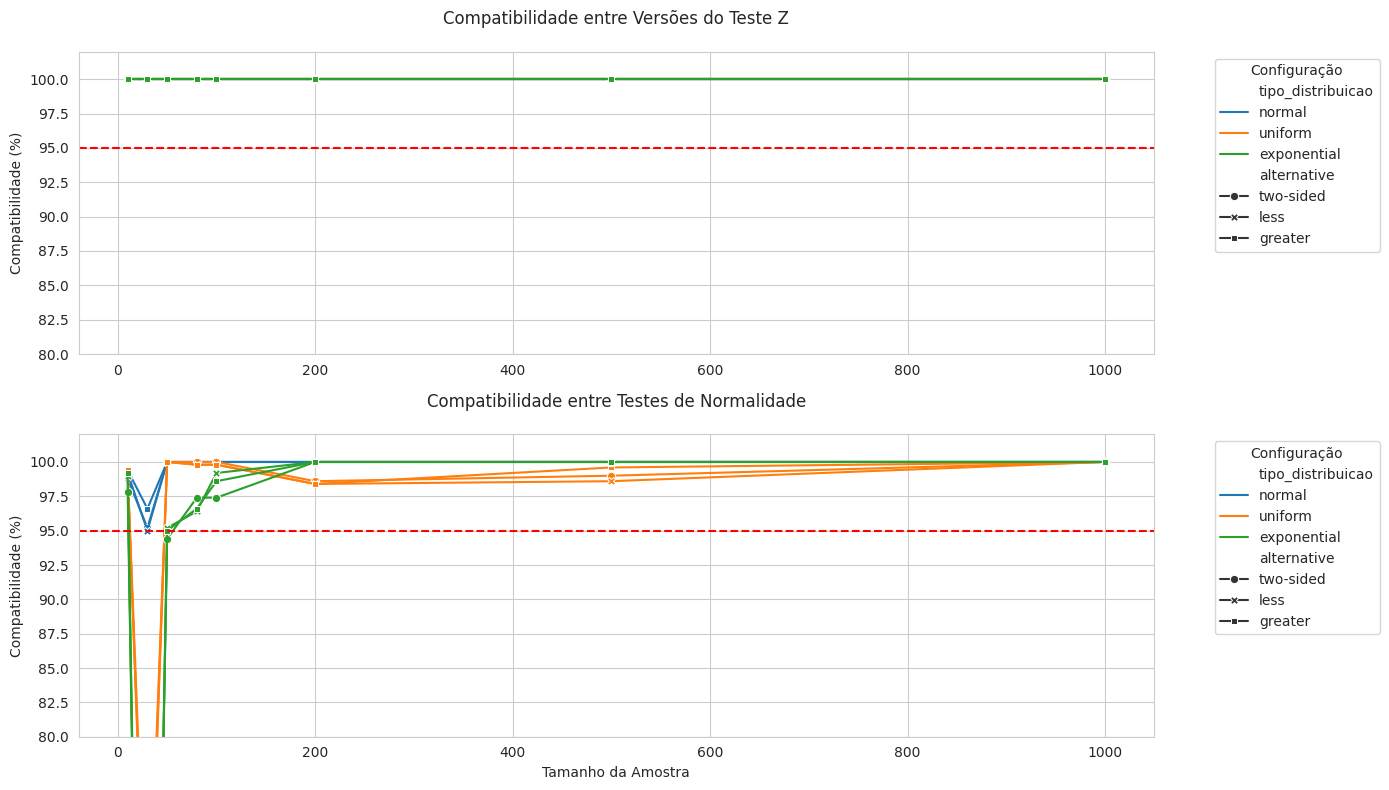

In [ ]:
# Configurações
tamanhos = [10, 30, 50, 80, 100, 200, 500, 1000]
n_simulacoes = 500
alpha = 0.05

# Testar para diferentes distribuições
distribuicoes = ['normal', 'uniform', 'exponential']
alternativas = ['two-sided', 'less', 'greater']

# Lista para armazenar todos os resultados
todos_resultados = []

for dist in distribuicoes:
    for alt in alternativas:
        print(f"Validando para {dist} com teste {alt}...")
        df = validar_z_test(
            tamanhos_amostra=tamanhos,
            n_simulacoes=n_simulacoes,
            alpha=alpha,
            alternative=alt,
            tipo_dist=dist,
            pop_mean=5,
            pop_std=2
        )
        todos_resultados.append(df)

# Combinar todos os resultados
resultados_completos = pd.concat(todos_resultados)

# Exibir resultados
print("\nResultados Consolidados:")
print(resultados_completos[['tamanho_amostra', 'tipo_distribuicao', 'alternative',
                              'porcentagem_compatibilidade', 'simulacoes_validas']])

# Plotar resultados
plotar_resultados_z(resultados_completos)

In [ ]:
# Resumo estatístico
resumo_estatistico = resumo_estatistico_z(resultados_completos)
print("\nResumo Estatístico:")
print(resumo_estatistico)


Resumo Estatístico:
  Distribuição Tipo de Teste  Média Compatibilidade  Desvio Compatibilidade  \
0  exponential       greater                  100.0                     0.0   
1  exponential          less                  100.0                     0.0   
2  exponential     two-sided                  100.0                     0.0   
3       normal       greater                  100.0                     0.0   
4       normal          less                  100.0                     0.0   
5       normal     two-sided                  100.0                     0.0   
6      uniform       greater                  100.0                     0.0   
7      uniform          less                  100.0                     0.0   
8      uniform     two-sided                  100.0                     0.0   

   Mín Compatibilidade  Máx Compatibilidade  Média Normalidade  \
0                100.0                100.0             88.100   
1                100.0                100.0             

## Teste T

Utilizado quando o desvio padrão populacional é desconhecido e para amostras pequenas (n <= 30)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t, ttest_1samp, norm, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

def t_test_manual(data, pop_mean, alpha=0.05, alternative='two-sided', normalidade_alpha=0.05):
    """
    Teste t de Student manual para média populacional com verificação de normalidade

    Parâmetros:
    data: array-like - dados da amostra
    pop_mean: float - média populacional sob H0 (μ0)
    alpha: float - nível de significância para teste t
    alternative: str - tipo de teste ('two-sided', 'less', 'greater')
    normalidade_alpha: float - nível para teste de normalidade

    Retorna:
    dict: {
        't_calc': estatística do teste,
        't_crit': valor(s) crítico(s),
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'gl': graus de liberdade (n-1),
        'alpha': nível de significância,
        'normalidade': resultados do teste de normalidade,
        'aviso': mensagem de aviso se necessário
    }
    """
    data = np.asarray(data)
    n = len(data)
    gl = n - 1  # graus de liberdade
    aviso = None

    # Verificação de normalidade (usando função existente)
    normalidade_result = None
    if n <= 30:  # Só verifica normalidade para amostras pequenas
        try:
            normalidade_result = shapiro_wilk_manual(data, alpha=normalidade_alpha)
            if normalidade_result['rejeita_H0']:
                aviso = "Aviso: Amostra pequena e normalidade rejeitada. Resultados podem não ser válidos."
        except Exception as e:
            aviso = f"Aviso: Falha no teste de normalidade: {str(e)}"

    # Cálculos do teste t
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Desvio padrão amostral (com ddof=1)
    std_error = sample_std / np.sqrt(n)

    t_calc = (sample_mean - pop_mean) / std_error

    # Determinar valores críticos e p-value
    if alternative == 'two-sided':
        t_crit = t.ppf(1 - alpha/2, gl)
        p_value = 2 * (1 - t.cdf(abs(t_calc), gl))
        rejeita_H0 = abs(t_calc) > t_crit
    elif alternative == 'less':
        t_crit = t.ppf(alpha, gl)
        p_value = t.cdf(t_calc, gl)
        rejeita_H0 = t_calc < t_crit
    elif alternative == 'greater':
        t_crit = t.ppf(1 - alpha, gl)
        p_value = 1 - t.cdf(t_calc, gl)
        rejeita_H0 = t_calc > t_crit

    return {
        't_calc': t_calc,
        't_crit': (-t_crit, t_crit) if alternative == 'two-sided' else t_crit,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'gl': gl,
        'alpha': alpha,
        'normalidade': normalidade_result,
        'aviso': aviso,
        'n': n,
        'sample_mean': sample_mean,
        'sample_std': sample_std
    }

def t_test_lib(data, pop_mean, alpha=0.05, alternative='two-sided', normalidade_alpha=0.05):
    """
    Teste t de Student usando scipy.stats.ttest_1samp com validação de normalidade

    Parâmetros:
    data: array-like - dados da amostra
    pop_mean: float - média populacional sob H0 (μ0)
    alpha: float - nível de significância
    alternative: str - tipo de teste ('two-sided', 'less', 'greater')
    normalidade_alpha: float - nível para teste de normalidade

    Retorna:
    dict: {
        't_calc': estatística do teste,
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'gl': graus de liberdade,
        'alpha': nível de significância,
        'normalidade': resultados do teste de normalidade,
        'aviso': mensagem de aviso se necessário
    }
    """
    from scipy.stats import ttest_1samp

    data = np.asarray(data)
    n = len(data)
    gl = n - 1
    aviso = None

    # Verificação de normalidade
    normalidade_result = None
    if n <= 30:
        try:
            normalidade_result = shapiro_wilk_lib(data, alpha=normalidade_alpha)
            if normalidade_result['rejeita_H0']:
                aviso = "Aviso: Amostra pequena e normalidade rejeitada. Resultados podem não ser válidos."
        except Exception as e:
            aviso = f"Aviso: Falha no teste de normalidade: {str(e)}"

    # Teste t com scipy
    t_calc, p_value_two_sided = ttest_1samp(data, pop_mean)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)

    # Ajustar p-value para testes unilaterais
    if alternative == 'less':
        if t_calc < 0:
            p_value = p_value_two_sided / 2
        else:
            p_value = 1 - (p_value_two_sided / 2)
    elif alternative == 'greater':
        if t_calc > 0:
            p_value = p_value_two_sided / 2
        else:
            p_value = 1 - (p_value_two_sided / 2)
    else:
        p_value = p_value_two_sided

    rejeita_H0 = p_value < alpha

    return {
        't_calc': t_calc,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'gl': gl,
        'alpha': alpha,
        'normalidade': normalidade_result,
        'aviso': aviso,
        'n': n,
        'sample_mean': sample_mean,
        'sample_std': sample_std
    }

In [ ]:
def gerar_amostra_t(tamanho, pop_mean=0, pop_std=1, tipo='normal'):
    """
    Gera amostras aleatórias para o teste T com controle de parâmetros

    Parâmetros:
    tamanho: int - tamanho da amostra
    pop_mean: float - média da população
    pop_std: float - desvio padrão da população
    tipo: str - tipo de distribuição ('normal', 'uniform', 'exponential')

    Retorna:
    np.array: amostra gerada
    """
    if tipo == 'normal':
        return np.random.normal(loc=pop_mean, scale=pop_std, size=tamanho)
    elif tipo == 'uniform':
        low = pop_mean - pop_std * np.sqrt(3)
        high = pop_mean + pop_std * np.sqrt(3)
        return np.random.uniform(low=low, high=high, size=tamanho)
    elif tipo == 'exponential':
        scale = pop_mean if pop_mean > 0 else 1
        return np.random.exponential(scale=scale, size=tamanho)
    else:
        raise ValueError("Tipo de distribuição não suportado. Use 'normal', 'uniform' ou 'exponential'")

def comparar_t_test(data, pop_mean, alpha=0.05, alternative='two-sided', normalidade_alpha=0.05):
    """
    Compara as versões manual e com biblioteca do teste t

    Parâmetros:
    data: array-like - dados da amostra
    pop_mean: float - média populacional sob H0
    alpha: float - nível de significância
    alternative: str - tipo de teste
    normalidade_alpha: float - nível para teste de normalidade

    Retorna:
    dict: {
        'manual': resultados da versão manual,
        'biblioteca': resultados da versão com biblioteca,
        'compativel': True se as decisões do teste t forem iguais,
        'normalidade_compativel': True se as decisões de normalidade forem iguais
    }
    """
    resultado_manual = t_test_manual(data, pop_mean, alpha, alternative, normalidade_alpha)
    resultado_lib = t_test_lib(data, pop_mean, alpha, alternative, normalidade_alpha)

    # Comparar decisões do teste t
    compativel_t = resultado_manual['rejeita_H0'] == resultado_lib['rejeita_H0']

    # Comparar decisões de normalidade (se aplicável)
    normalidade_compativel = None
    if resultado_manual['normalidade'] is not None and resultado_lib['normalidade'] is not None:
        normalidade_compativel = (
            resultado_manual['normalidade']['rejeita_H0'] ==
            resultado_lib['normalidade']['rejeita_H0']
        )

    return {
        'manual': resultado_manual,
        'biblioteca': resultado_lib,
        'compativel': compativel_t,
        'normalidade_compativel': normalidade_compativel,
        'n': len(data),
        'amostra_pequena': len(data) < 30
    }

In [ ]:
# Gerar amostra
dados = gerar_amostra_t(25, pop_mean=5, pop_std=2, tipo='normal')

# Teste manual
resultado_manual = t_test_manual(dados, pop_mean=5)
print("Resultado Manual:")
print(pd.DataFrame([resultado_manual]))

# Teste com biblioteca
resultado_lib = t_test_lib(dados, pop_mean=5)
print("\n\nResultado Biblioteca:")
print(pd.DataFrame([resultado_lib]))

# Comparação
comparacao = comparar_t_test(dados, pop_mean=5)
print("\n\nComparação:")
print(pd.DataFrame([comparacao]))

Resultado Manual:
     t_calc                                     t_crit   p_value  rejeita_H0  \
0 -2.052442  (-2.0638985616280205, 2.0638985616280205)  0.051186       False   

   gl  alpha                                        normalidade aviso   n  \
0  24   0.05  {'W': 0.9505037420277591, 'W_critico': 0.918, ...  None  25   

   sample_mean  sample_std  
0     4.185204    1.984942  


Resultado Biblioteca:
     t_calc   p_value  rejeita_H0  gl  alpha  \
0 -2.052442  0.051186       False  24   0.05   

                                         normalidade aviso   n  sample_mean  \
0  {'W': 0.9519523560093428, 'W_critico': None, '...  None  25     4.185204   

   sample_std  
0    1.984942  


Comparação:
                                              manual  \
0  {'t_calc': -2.052442356172346, 't_crit': (-2.0...   

                                          biblioteca  compativel  \
0  {'t_calc': -2.052442356172346, 'p_value': 0.05...        True   

   normalidade_compativel   n  a

In [ ]:
def validar_t_test(tamanhos_amostra, n_simulacoes=100, alpha=0.05, alternative='two-sided',
                  pop_mean=0, pop_std=1, tipo_dist='normal', normalidade_alpha=0.05):
    """
    Validação completa do teste T com verificações de normalidade

    Parâmetros:
    tamanhos_amostra: list - lista de tamanhos de amostra
    n_simulacoes: int - simulações por tamanho
    alpha: float - nível de significância para teste T
    alternative: str - tipo de teste T
    pop_mean: float - média populacional
    pop_std: float - desvio padrão populacional
    tipo_dist: str - tipo de distribuição
    normalidade_alpha: float - nível para teste de normalidade

    Retorna:
    pd.DataFrame: resultados da validação
    """
    resultados = []

    for tamanho in tamanhos_amostra:
        compatibilidades = []
        normalidades_compat = []
        avisos = []

        for _ in range(n_simulacoes):
            amostra = gerar_amostra_t(tamanho, pop_mean, pop_std, tipo_dist)

            try:
                comparacao = comparar_t_test(
                    data=amostra,
                    pop_mean=pop_mean,
                    alpha=alpha,
                    alternative=alternative,
                    normalidade_alpha=normalidade_alpha
                )

                if comparacao['compativel'] is not None:
                    compatibilidades.append(comparacao['compativel'])

                if comparacao['normalidade_compativel'] is not None:
                    normalidades_compat.append(comparacao['normalidade_compativel'])

                # Registrar avisos
                aviso_manual = comparacao['manual'].get('aviso')
                aviso_lib = comparacao['biblioteca'].get('aviso')
                if aviso_manual or aviso_lib:
                    avisos.append(aviso_manual if aviso_manual else aviso_lib)

            except Exception as e:
                print(f"Erro com tamanho {tamanho}: {str(e)}")
                continue

        # Calcular estatísticas
        porcentagem = np.mean(compatibilidades) * 100 if compatibilidades else 0
        porcentagem_normalidade = np.mean(normalidades_compat) * 100 if normalidades_compat else 0
        aviso_frequente = pd.Series(avisos).mode()[0] if avisos else None

        resultados.append({
            'tamanho_amostra': tamanho,
            'porcentagem_compatibilidade': porcentagem,
            'porcentagem_normalidade_compat': porcentagem_normalidade,
            'simulacoes_validas': len(compatibilidades),
            'aviso_mais_comum': aviso_frequente,
            'alpha': alpha,
            'alternative': alternative,
            'tipo_distribuicao': tipo_dist,
            'normalidade_alpha': normalidade_alpha
        })

    return pd.DataFrame(resultados)

In [ ]:
def plotar_resultados_t(df_resultados):
    """
    Plota resultados da validação do teste T

    Parâmetros:
    df_resultados: pd.DataFrame - resultados da validação
    """
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Gráfico de compatibilidade do teste T
    plt.subplot(2, 1, 1)
    ax1 = sns.lineplot(
        data=df_resultados,
        x='tamanho_amostra',
        y='porcentagem_compatibilidade',
        hue='tipo_distribuicao',
        style='alternative',
        markers=True,
        dashes=False
    )
    plt.title('Compatibilidade entre Versões do Teste T', pad=20)
    plt.xlabel('')
    plt.ylabel('Compatibilidade (%)')
    plt.ylim(80, 102)
    plt.axhline(y=95, color='red', linestyle='--')
    plt.legend(title='Configuração', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Gráfico de compatibilidade dos testes de normalidade
    plt.subplot(2, 1, 2)
    ax2 = sns.lineplot(
        data=df_resultados,
        x='tamanho_amostra',
        y='porcentagem_normalidade_compat',
        hue='tipo_distribuicao',
        style='alternative',
        markers=True,
        dashes=False
    )
    plt.title('Compatibilidade entre Testes de Normalidade', pad=20)
    plt.xlabel('Tamanho da Amostra')
    plt.ylabel('Compatibilidade (%)')
    plt.ylim(80, 102)
    plt.axhline(y=95, color='red', linestyle='--')
    plt.legend(title='Configuração', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

def resumo_estatistico_t(df_resultados):
    """
    Gera um resumo estatístico dos resultados da validação

    Parâmetros:
    df_resultados: pd.DataFrame - resultados da validação

    Retorna:
    pd.DataFrame: resumo estatístico
    """
    resumo = df_resultados.groupby(['tipo_distribuicao', 'alternative']).agg({
        'porcentagem_compatibilidade': ['mean', 'std', 'min', 'max'],
        'porcentagem_normalidade_compat': ['mean', 'std'],
        'simulacoes_validas': 'sum',
        'aviso_mais_comum': lambda x: x.mode()[0] if not x.isnull().all() else None
    }).reset_index()

    # Renomear colunas
    resumo.columns = [
        'Distribuição', 'Tipo de Teste',
        'Média Compatibilidade', 'Desvio Compatibilidade',
        'Mín Compatibilidade', 'Máx Compatibilidade',
        'Média Normalidade', 'Desvio Normalidade',
        'Total Simulações', 'Aviso Mais Comum'
    ]

    return resumo


Validando para normal com teste two-sided...

Validando para uniform com teste greater...

Validando para exponential com teste less...

=== Resumo Estatístico ===
  Distribuição Tipo de Teste  Média Compatibilidade  Desvio Compatibilidade  \
0  exponential          less                  100.0                     0.0   
1       normal     two-sided                  100.0                     0.0   
2      uniform       greater                  100.0                     0.0   

   Mín Compatibilidade  Máx Compatibilidade  Média Normalidade  \
0                100.0                100.0              99.44   
1                100.0                100.0              99.40   
2                100.0                100.0              98.56   

   Desvio Normalidade  Total Simulações  \
0            0.841427              2500   
1            0.824621              2500   
2            1.883614              2500   

                                    Aviso Mais Comum  
0  Aviso: Amostra pequena

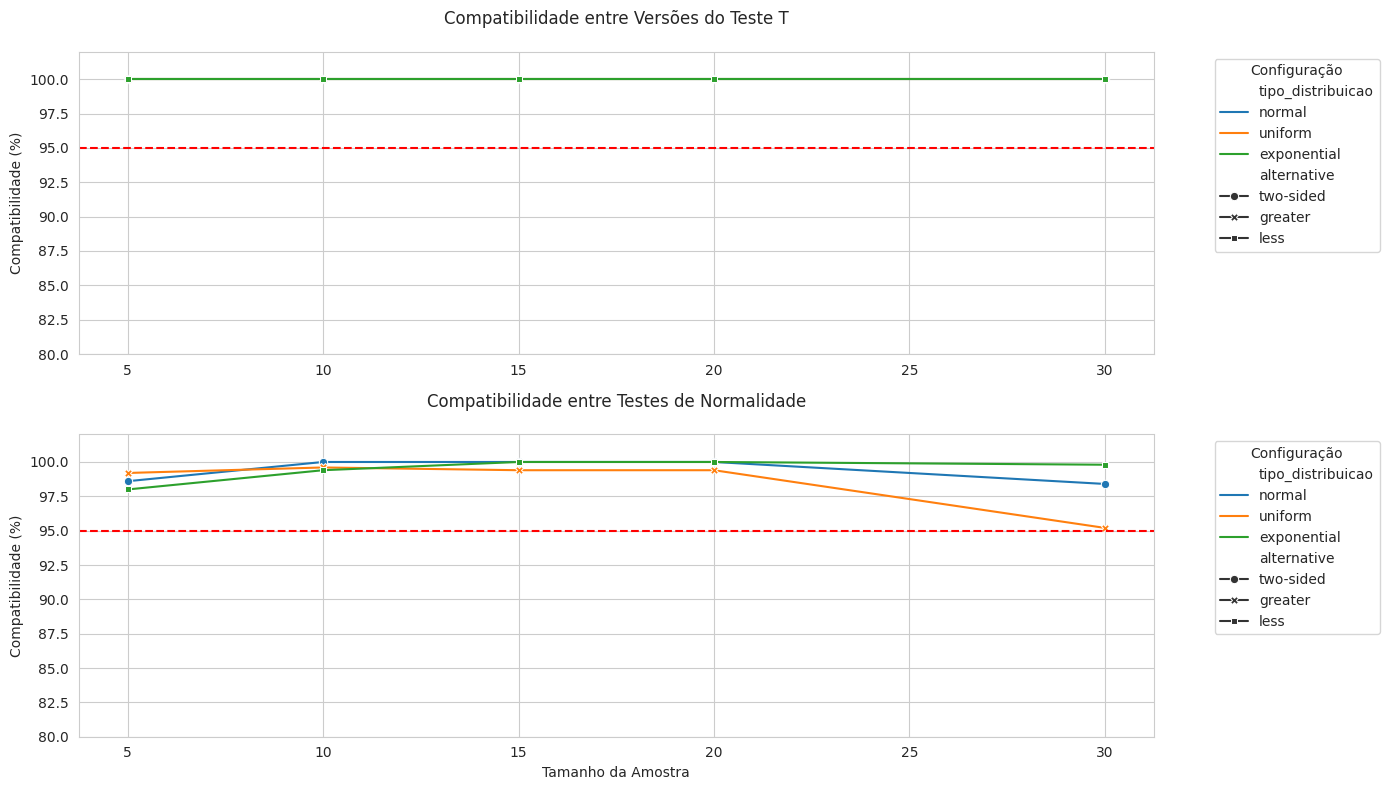

In [ ]:
# Configurações
tamanhos = [5, 10, 15, 20, 30]
n_simulacoes = 500
alpha = 0.05
normalidade_alpha = 0.10  # Mais liberal para normalidade

# Testar diferentes cenários
cenarios = [
    {'tipo_dist': 'normal', 'alternative': 'two-sided'},
    {'tipo_dist': 'uniform', 'alternative': 'greater'},
    {'tipo_dist': 'exponential', 'alternative': 'less'}
]

# Executar validações
resultados_completos = pd.DataFrame()

for cenario in cenarios:
    print(f"\nValidando para {cenario['tipo_dist']} com teste {cenario['alternative']}...")

    df = validar_t_test(
        tamanhos_amostra=tamanhos,
        n_simulacoes=n_simulacoes,
        alpha=alpha,
        alternative=cenario['alternative'],
        tipo_dist=cenario['tipo_dist'],
        pop_mean=5,
        pop_std=2,
        normalidade_alpha=normalidade_alpha
    )

    resultados_completos = pd.concat([resultados_completos, df])

# Exibir resultados
print("\n=== Resumo Estatístico ===")
resumo = resumo_estatistico_t(resultados_completos)
print(resumo)

# Plotar resultados
plotar_resultados_t(resultados_completos)

# 4. Testes para diferença de médias

## Duas médias independentes

In [ ]:
import numpy as np
from scipy.stats import t, ttest_ind

def t_test_amostras_independentes(amostra1, amostra2, alpha=0.05, alternative='two-sided',
                                 verificar_normalidade=True, verificar_homogeneidade=True,
                                 normalidade_alpha=0.05, homogeneidade_alpha=0.05):
    """
    Teste T para duas amostras independentes com verificações completas

    Parâmetros:
    amostra1, amostra2: arrays - dados das amostras
    alpha: float - nível de significância para o teste T
    alternative: str - 'two-sided', 'less' ou 'greater'
    verificar_normalidade: bool - se deve verificar normalidade
    verificar_homogeneidade: bool - se deve verificar homogeneidade
    normalidade_alpha: float - nível para testes de normalidade
    homogeneidade_alpha: float - nível para teste de homogeneidade

    Retorna:
    dict: {
        'resultado_t': dict - resultados do teste T,
        'normalidade': dict - resultados dos testes de normalidade,
        'homogeneidade': dict - resultado do teste de homogeneidade,
        'equal_var': bool - se assumiu variâncias iguais,
        'premissas_atendidas': bool - se premissas foram atendidas,
        'avisos': list - mensagens de aviso
    }
    """
    # Converter para arrays numpy
    amostra1 = np.asarray(amostra1)
    amostra2 = np.asarray(amostra2)
    n1 = len(amostra1)
    n2 = len(amostra2)

    resultados = {
        'normalidade': {'amostra1': None, 'amostra2': None},
        'homogeneidade': None,
        'equal_var': None,
        'premissas_atendidas': True,
        'avisos': []
    }

    # 1. Verificação de normalidade (Shapiro-Wilk)
    if verificar_normalidade:
        resultados['normalidade']['amostra1'] = shapiro_wilk_manual(amostra1, alpha=normalidade_alpha)
        resultados['normalidade']['amostra2'] = shapiro_wilk_manual(amostra2, alpha=normalidade_alpha)

        # Verificar se amostras pequenas são normais
        if n1 < 30 and resultados['normalidade']['amostra1']['rejeita_H0']:
            resultados['premissas_atendidas'] = False
            resultados['avisos'].append("Amostra 1 não normal (p-value={:.4f})".format(
                resultados['normalidade']['amostra1']['p_value']))

        if n2 < 30 and resultados['normalidade']['amostra2']['rejeita_H0']:
            resultados['premissas_atendidas'] = False
            resultados['avisos'].append("Amostra 2 não normal (p-value={:.4f})".format(
                resultados['normalidade']['amostra2']['p_value']))

    # 2. Verificação de homogeneidade de variâncias (Bartlett)
    if verificar_homogeneidade and resultados['premissas_atendidas']:
        resultados['homogeneidade'] = bartlett_test_manual(amostra1, amostra2, alpha=homogeneidade_alpha)
        resultados['equal_var'] = not resultados['homogeneidade']['rejeita_H0']

        if resultados['homogeneidade']['rejeita_H0']:
            resultados['avisos'].append("Variâncias diferentes (p-value={:.4f})".format(
                resultados['homogeneidade']['p_value']))
    else:
        resultados['equal_var'] = False  # Assume variâncias diferentes por padrão

    # 3. Executar o teste T apropriado
    if resultados['premissas_atendidas']:
        # Calcular estatísticas descritivas
        media1, media2 = np.mean(amostra1), np.mean(amostra2)
        std1, std2 = np.std(amostra1, ddof=1), np.std(amostra2, ddof=1)

        if resultados['equal_var']:
            # Caso variâncias iguais
            gl = n1 + n2 - 2
            sp = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / gl)
            t_calc = (media1 - media2) / (sp * np.sqrt(1/n1 + 1/n2))
        else:
            # Caso variâncias diferentes (Welch)
            var1, var2 = std1**2, std2**2
            t_calc = (media1 - media2) / np.sqrt(var1/n1 + var2/n2)

            # Graus de liberdade (aproximação de Welch-Satterthwaite)
            gl_num = (var1/n1 + var2/n2)**2
            gl_den = (var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1)
            gl = gl_num / gl_den

        # Calcular p-value
        if alternative == 'two-sided':
            p_value = 2 * (1 - t.cdf(abs(t_calc), gl))
        elif alternative == 'less':
            p_value = t.cdf(t_calc, gl)
        elif alternative == 'greater':
            p_value = 1 - t.cdf(t_calc, gl)

        # Decisão do teste
        rejeita_H0 = p_value < alpha

        resultados['resultado_t'] = {
            't_calc': t_calc,
            'gl': gl,
            'p_value': p_value,
            'rejeita_H0': rejeita_H0,
            'media1': media1,
            'media2': media2,
            'std1': std1,
            'std2': std2,
            'alpha': alpha,
            'alternative': alternative
        }
    else:
        resultados['resultado_t'] = None
        resultados['avisos'].append("Teste T não realizado - premissas não atendidas")

    return resultados

def t_test_independente_lib(amostra1, amostra2, alpha=0.05, alternative='two-sided', equal_var=False):
    """
    Teste t de Student para duas amostras independentes usando scipy.stats

    Parâmetros:
    amostra1: array-like - primeira amostra
    amostra2: array-like - segunda amostra
    alpha: float - nível de significância
    alternative: str - tipo de teste ('two-sided', 'less', 'greater')
    equal_var: bool - se True assume variâncias iguais (Caso 2), se False assume variâncias diferentes (Caso 1)

    Retorna:
    dict: {
        't_calc': estatística do teste,
        'gl': graus de liberdade,
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'alpha': nível de significância,
        'equal_var': se usou variâncias iguais
    }
    """
    t_calc, p_value = ttest_ind(amostra1, amostra2, equal_var=equal_var)
    n1 = len(amostra1)
    n2 = len(amostra2)

    # Ajuste para testes unilaterais
    if alternative == 'less':
        if t_calc < 0:
            p_value = p_value/2
        else:
            p_value = 1 - p_value/2
    elif alternative == 'greater':
        if t_calc > 0:
            p_value = p_value/2
        else:
            p_value = 1 - p_value/2

    # Graus de liberdade
    if equal_var:
        gl = n1 + n2 - 2
    else:
        var1 = np.var(amostra1, ddof=1)
        var2 = np.var(amostra2, ddof=1)
        num = (var1/n1 + var2/n2)**2
        den = (var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1)
        gl = num / den

    rejeita_H0 = p_value < alpha

    return {
        't_calc': t_calc,
        'gl': gl,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'alpha': alpha,
        'equal_var': equal_var,
        'n1': n1,
        'n2': n2
    }

In [ ]:
def comparar_t_independente(amostra1, amostra2, alpha=0.05, alternative='two-sided', equal_var=False):
    """
    Compara as versões manual e com biblioteca do teste t para amostras independentes

    Parâmetros:
    amostra1: array-like - primeira amostra
    amostra2: array-like - segunda amostra
    alpha: float - nível de significância
    alternative: str - tipo de teste
    equal_var: bool - se assume variâncias iguais

    Retorna:
    dict: {
        'manual': resultados da versão manual,
        'biblioteca': resultados da versão com biblioteca,
        'compativel': True se as decisões forem iguais
    }
    """
    resultado_manual = t_test_amostras_independentes(amostra1, amostra2, alpha, alternative, equal_var)
    resultado_lib = t_test_independente_lib(amostra1, amostra2, alpha, alternative, equal_var)

    return {
        'manual': resultado_manual,
        'biblioteca': resultado_lib,
        'compativel': resultado_manual['rejeita_H0'] == resultado_lib['rejeita_H0'],
        'equal_var': equal_var,
        'n1': len(amostra1),
        'n2': len(amostra2)
    }

def validar_t_test(configuracoes, n_simulacoes=100):
    """
    Função de validação completa do teste T para amostras independentes

    Parâmetros:
    configuracoes: list - lista de dicionários com configurações
    n_simulacoes: int - número de simulações por configuração

    Retorna:
    pd.DataFrame - resultados da validação
    """
    resultados = []

    for config in configuracoes:
        compatibilidades = []
        premissas_atendidas = []
        avisos = []

        for _ in range(n_simulacoes):
            # Gerar amostras
            amostra1 = gerar_amostra_t(config['n1'], config['pop_mean1'], config['pop_std1'], config['tipo_dist1'])
            amostra2 = gerar_amostra_t(config['n2'], config['pop_mean2'], config['pop_std2'], config['tipo_dist2'])

            # Executar teste completo
            resultado = t_test_amostras_independentes(
                amostra1, amostra2,
                alpha=config.get('alpha', 0.05),
                alternative=config.get('alternative', 'two-sided'),
                normalidade_alpha=config.get('normalidade_alpha', 0.05),
                homogeneidade_alpha=config.get('homogeneidade_alpha', 0.05)
            )

            # Comparar com implementação da biblioteca
            if resultado['resultado_t'] is not None:
                resultado_lib = t_test_independente_lib(
                    amostra1, amostra2,
                    alpha=config.get('alpha', 0.05),
                    alternative=config.get('alternative', 'two-sided'),
                    equal_var=resultado['equal_var']
                )

                compatibilidade = resultado['resultado_t']['rejeita_H0'] == resultado_lib['rejeita_H0']
                compatibilidades.append(compatibilidade)

            premissas_atendidas.append(resultado['premissas_atendidas'])
            avisos.extend(resultado['avisos'])

        # Calcular estatísticas
        stats = {
            'configuracao': str(config),
            'compatibilidade': np.mean(compatibilidades) if compatibilidades else np.nan,
            'taxa_premissas_atendidas': np.mean(premissas_atendidas),
            'simulacoes_validas': len(compatibilidades),
            'aviso_mais_comum': max(set(avisos), key=avisos.count) if avisos else None
        }

        resultados.append(stats)

    return pd.DataFrame(resultados)

In [ ]:
# Configuração dos testes
configuracoes = [
    {
        'n1': 20, 'n2': 20,
        'pop_mean1': 5, 'pop_mean2': 5.5,
        'pop_std1': 1, 'pop_std2': 1,
        'tipo_dist1': 'normal', 'tipo_dist2': 'normal',
        'alpha': 0.05, 'alternative': 'two-sided'
    },
    {
        'n1': 30, 'n2': 25,
        'pop_mean1': 5, 'pop_mean2': 5,
        'pop_std1': 1, 'pop_std2': 2,
        'tipo_dist1': 'normal', 'tipo_dist2': 'normal',
        'alpha': 0.05, 'alternative': 'two-sided'
    }
]

# Executar validação
resultados = validar_t_test(configuracoes, n_simulacoes=200)

# Analisar resultados
print("Resultados da Validação:")
print(resultados[['configuracao', 'compatibilidade', 'taxa_premissas_atendidas', 'aviso_mais_comum']])

# Exemplo de teste individual
amostra1 = gerar_amostra_t(15, pop_mean=5, pop_std=1, tipo='normal')
amostra2 = gerar_amostra_t(20, pop_mean=6, pop_std=1.5, tipo='normal')

resultado_teste = t_test_amostras_independentes(amostra1, amostra2)
print("\nResultado do Teste Individual:")
print(f"Estatística T: {resultado_teste['resultado_t']['t_calc']:.4f}")
print(f"P-valor: {resultado_teste['resultado_t']['p_value']:.4f}")
print(f"Premissas atendidas: {resultado_teste['premissas_atendidas']}")
print("Avisos:", resultado_teste['avisos'])

Resultados da Validação:
                                        configuracao  compatibilidade  \
0  {'n1': 20, 'n2': 20, 'pop_mean1': 5, 'pop_mean...              1.0   
1  {'n1': 30, 'n2': 25, 'pop_mean1': 5, 'pop_mean...              1.0   

   taxa_premissas_atendidas                                 aviso_mais_comum  
0                     0.915  Teste T não realizado - premissas não atendidas  
1                     0.965           Variâncias diferentes (p-value=0.0000)  

Resultado do Teste Individual:
Estatística T: -1.8143
P-valor: 0.0787
Premissas atendidas: True
Avisos: []


## Amostras emparelhadas

In [ ]:
import numpy as np
from scipy.stats import t, ttest_rel

def t_test_emparelhado_manual(amostra_antes, amostra_depois, alpha=0.05, alternative='two-sided',
                             verificar_normalidade=True, normalidade_alpha=0.05):
    """
    Teste T para amostras emparelhadas com verificações de normalidade

    Parâmetros:
    amostra_antes, amostra_depois: arrays - dados das medições antes e depois
    alpha: float - nível de significância
    alternative: str - 'two-sided', 'less' ou 'greater'
    verificar_normalidade: bool - verificar normalidade das diferenças
    normalidade_alpha: float - nível para teste de normalidade

    Retorna:
    dict: {
        't_calc': estatística do teste,
        'gl': graus de liberdade,
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'diferenca_media': média das diferenças,
        'diferenca_std': desvio padrão das diferenças,
        'normalidade': resultado do teste de normalidade,
        'premissas_atendidas': bool,
        'avisos': list
    }
    """
    # Converter para arrays numpy
    antes = np.asarray(amostra_antes)
    depois = np.asarray(amostra_depois)
    n = len(antes)

    if len(depois) != n:
        raise ValueError("Amostras devem ter o mesmo tamanho para teste emparelhado")

    resultados = {
        'premissas_atendidas': True,
        'avisos': []
    }

    # 1. Calcular diferenças
    diferencas = antes - depois
    d_media = np.mean(diferencas)
    d_std = np.std(diferencas, ddof=1)

    # 2. Verificação de normalidade das diferenças
    if verificar_normalidade:
        normalidade = shapiro_wilk_manual(diferencas, alpha=normalidade_alpha)
        resultados['normalidade'] = normalidade

        if n < 30 and normalidade['rejeita_H0']:
            resultados['premissas_atendidas'] = False
            resultados['avisos'].append(
                f"Diferenças não normais (p-value={normalidade['p_value']:.4f})")

    # 3. Executar teste T se premissas atendidas
    if resultados['premissas_atendidas']:
        # Calcular estatística T
        t_calc = d_media / (d_std / np.sqrt(n))
        gl = n - 1

        # Calcular p-value
        if alternative == 'two-sided':
            p_value = 2 * (1 - t.cdf(abs(t_calc), gl))
        elif alternative == 'less':
            p_value = t.cdf(t_calc, gl)
        elif alternative == 'greater':
            p_value = 1 - t.cdf(t_calc, gl)

        # Decisão do teste
        rejeita_H0 = p_value < alpha

        resultados.update({
            't_calc': t_calc,
            'gl': gl,
            'p_value': p_value,
            'rejeita_H0': rejeita_H0,
            'diferenca_media': d_media,
            'diferenca_std': d_std,
            'alpha': alpha,
            'alternative': alternative
        })
    else:
        resultados.update({
            't_calc': None,
            'gl': None,
            'p_value': None,
            'rejeita_H0': None,
            'diferenca_media': d_media,
            'diferenca_std': d_std
        })
        resultados['avisos'].append("Teste T não realizado - premissas não atendidas")

    return resultados

def t_test_emparelhado_lib(amostra_antes, amostra_depois, alpha=0.05, alternative='two-sided'):
    """
    Teste T para amostras emparelhadas usando scipy.stats

    Parâmetros:
    amostra_antes, amostra_depois: arrays - dados antes e depois
    alpha: float - nível de significância
    alternative: str - tipo de teste

    Retorna:
    dict: {
        't_calc': estatística do teste,
        'p_value': valor p,
        'rejeita_H0': True se rejeita H0,
        'gl': graus de liberdade
    }
    """
    t_calc, p_value = ttest_rel(amostra_antes, amostra_depois)
    n = len(amostra_antes)
    gl = n - 1

    # Ajustar p-value para testes unilaterais
    if alternative == 'less':
        if t_calc < 0:
            p_value = p_value/2
        else:
            p_value = 1 - p_value/2
    elif alternative == 'greater':
        if t_calc > 0:
            p_value = p_value/2
        else:
            p_value = 1 - p_value/2

    rejeita_H0 = p_value < alpha

    return {
        't_calc': t_calc,
        'p_value': p_value,
        'rejeita_H0': rejeita_H0,
        'gl': gl,
        'alpha': alpha,
        'alternative': alternative
    }


In [ ]:
def comparar_t_emparelhado(amostra_antes, amostra_depois, alpha=0.05, alternative='two-sided'):
    """
    Compara as versões manual e com biblioteca do teste T emparelhado

    Parâmetros:
    amostra_antes, amostra_depois: arrays - dados antes e depois
    alpha: float - nível de significância
    alternative: str - tipo de teste

    Retorna:
    dict: {
        'manual': resultados da versão manual,
        'biblioteca': resultados da versão com biblioteca,
        'compativel': True se decisões forem iguais
    }
    """
    resultado_manual = t_test_emparelhado_manual(amostra_antes, amostra_depois, alpha, alternative)
    resultado_lib = t_test_emparelhado_lib(amostra_antes, amostra_depois, alpha, alternative)

    return {
        'manual': resultado_manual,
        'biblioteca': resultado_lib,
        'compativel': resultado_manual['rejeita_H0'] == resultado_lib['rejeita_H0'],
        'n': len(amostra_antes)
    }

def validar_t_emparelhado(configuracoes, n_simulacoes=100):
    """
    Validação do teste T para amostras emparelhadas

    Parâmetros:
    configuracoes: list - lista de dicionários com configurações
    n_simulacoes: int - número de simulações por configuração

    Retorna:
    pd.DataFrame - resultados da validação
    """
    resultados = []

    for config in configuracoes:
        compatibilidades = []
        premissas_atendidas = []
        avisos = []

        for _ in range(n_simulacoes):
            # Gerar dados emparelhados com correlação
            antes = gerar_amostra_t(config['n'], config['pop_mean_antes'], config['pop_std'], config['tipo_dist'])

            # Gerar "depois" com mudança baseada no efeito
            efeito = config.get('efeito', 0)
            depois = antes + np.random.normal(efeito, config.get('variabilidade_efeito', 0.1), config['n'])

            # Executar comparação
            try:
                comparacao = comparar_t_emparelhado(
                    antes, depois,
                    alpha=config.get('alpha', 0.05),
                    alternative=config.get('alternative', 'two-sided')
                )

                if comparacao['compativel'] is not None:
                    compatibilidades.append(comparacao['compativel'])

                premissas_atendidas.append(comparacao['manual']['premissas_atendidas'])
                avisos.extend(comparacao['manual']['avisos'])

            except Exception as e:
                print(f"Erro na configuração {config}: {str(e)}")
                continue

        # Calcular estatísticas
        stats = {
            'configuracao': str(config),
            'compatibilidade': np.mean(compatibilidades) if compatibilidades else np.nan,
            'taxa_premissas_atendidas': np.mean(premissas_atendidas),
            'simulacoes_validas': len(compatibilidades),
            'aviso_mais_comum': max(set(avisos), key=avisos.count) if avisos else None
        }

        resultados.append(stats)

    return pd.DataFrame(resultados)

In [ ]:
# Configuração de teste
config = {
    'n': 20,
    'pop_mean_antes': 5,
    'pop_std': 1.5,
    'tipo_dist': 'normal',
    'efeito': 0.5,  # Efeito a ser detectado
    'variabilidade_efeito': 0.2,
    'alpha': 0.05,
    'alternative': 'two-sided'
}

# Dados emparelhados de exemplo
antes = gerar_amostra_t(15, pop_mean=5, pop_std=1)
depois = antes + np.random.normal(0.7, 0.3, 15)  # Adiciona efeito

# Teste individual
resultado = t_test_emparelhado_manual(antes, depois)
print("Resultado do Teste Manual:")
print(pd.DataFrame([resultado]))

resultado_lib = t_test_emparelhado_lib(antes, depois)
print("\n\nResultado do Teste Biblioteca:")
print(pd.DataFrame([resultado_lib]))

# Comparação entre versões
comparacao = comparar_t_emparelhado(antes, depois)
print("\n\nComparação entre versões:")
print(pd.DataFrame([comparacao]))

# Validação completa
configuracoes = [
    {'n': 15, 'pop_mean_antes': 5, 'pop_std': 1, 'tipo_dist': 'normal', 'efeito': 0},
    {'n': 15, 'pop_mean_antes': 5, 'pop_std': 1, 'tipo_dist': 'normal', 'efeito': 1},
    {'n': 15, 'pop_mean_antes': 5, 'pop_std': 1, 'tipo_dist': 'normal', 'efeito': 2}
]

resultados = validar_t_emparelhado(configuracoes, n_simulacoes=200)
print("\n\nResultados da Validação:")
print(resultados[['configuracao', 'compatibilidade', 'taxa_premissas_atendidas']])

Resultado do Teste Manual:
   premissas_atendidas avisos  \
0                 True     []   

                                         normalidade     t_calc  gl  \
0  {'W': 0.9789696377872229, 'W_critico': 0.881, ... -10.246978  14   

        p_value  rejeita_H0  diferenca_media  diferenca_std  alpha alternative  
0  6.899274e-08        True        -0.767349        0.29003   0.05   two-sided  


Resultado do Teste Biblioteca:
      t_calc       p_value  rejeita_H0  gl  alpha alternative
0 -10.246978  6.899274e-08        True  14   0.05   two-sided


Comparação entre versões:
                                              manual  \
0  {'premissas_atendidas': True, 'avisos': [], 'n...   

                                          biblioteca  compativel   n  
0  {'t_calc': -10.246978221507328, 'p_value': 6.8...        True  15  


Resultados da Validação:
                                        configuracao  compatibilidade  \
0  {'n': 15, 'pop_mean_antes': 5, 'pop_std': 1, '...         